In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import yfinance as yf
import requests
from bs4 import BeautifulSoup
from datetime import timedelta
import numpy as np

In [3]:
# Load the file, skipping the first 15 rows
df = pd.read_csv("sp-500-pe-ratio-price-to-earnings-chart.csv", skiprows=15)

# Assign column names
df.columns = ["date", "pe"]

# Type conversion
df["date"] = pd.to_datetime(df["date"])
df["pe"] = pd.to_numeric(df["pe"], errors="coerce")

# Remove potential NaN values
df = df.dropna()

# Sort chronologically
df = df.sort_values("date").reset_index(drop=True)

df.head()

,date,pe
0,1927-12-01,15.9099
1,1928-01-01,14.8898
2,1928-02-01,14.6271
3,1928-03-01,16.3390
4,1928-04-01,15.8000


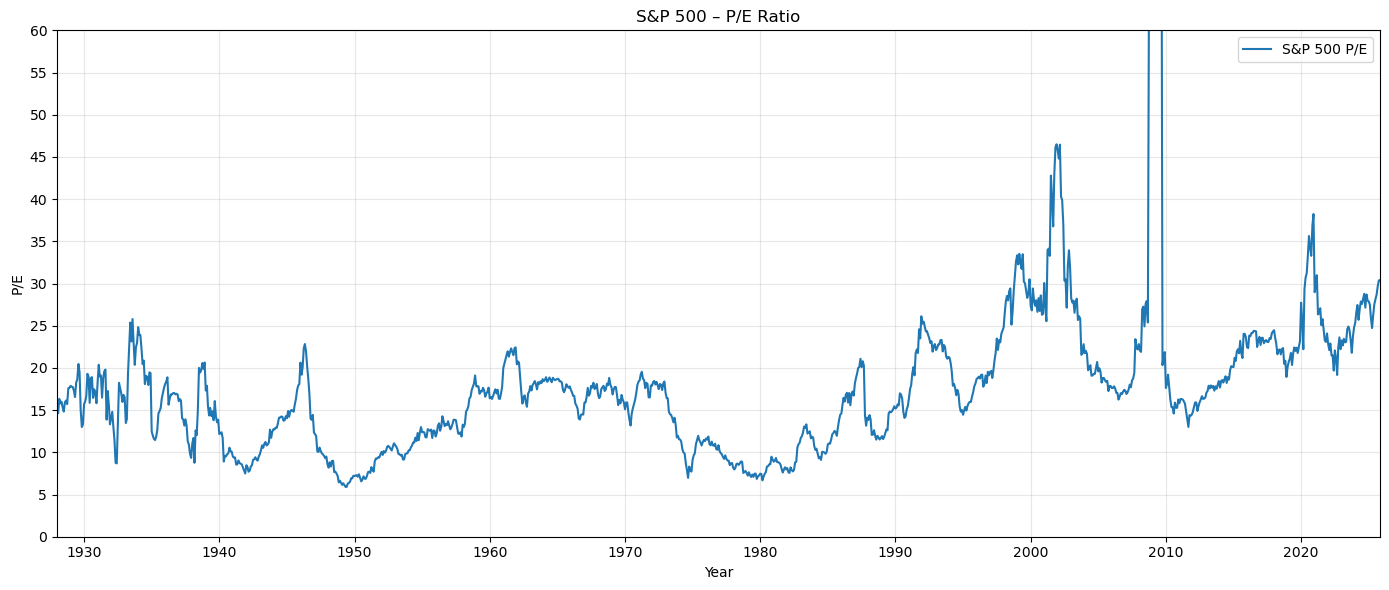

In [5]:
plt.figure(figsize=(14,6))
plt.plot(df["date"], df["pe"], label="S&P 500 P/E")

# Y-axis: step every 5, max 60
plt.ylim(0, 60)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))

# X-axis: step every 10 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Minimum X starting from 1928
plt.xlim(pd.Timestamp("1928-01-01"), df["date"].max())

plt.title("S&P 500 – P/E Ratio")
plt.xlabel("Year")
plt.ylabel("P/E")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Split data into time periods
df_1 = df[df["date"] < "2000-01-01"].copy()
df_2 = df[(df["date"] >= "2000-01-01") & (df["date"] < "2010-01-01")].copy()
df_3 = df[(df["date"] >= "2010-01-01") & (df["date"] < "2020-01-01")].copy()
df_4 = df[df["date"] >= "2020-01-01"].copy()

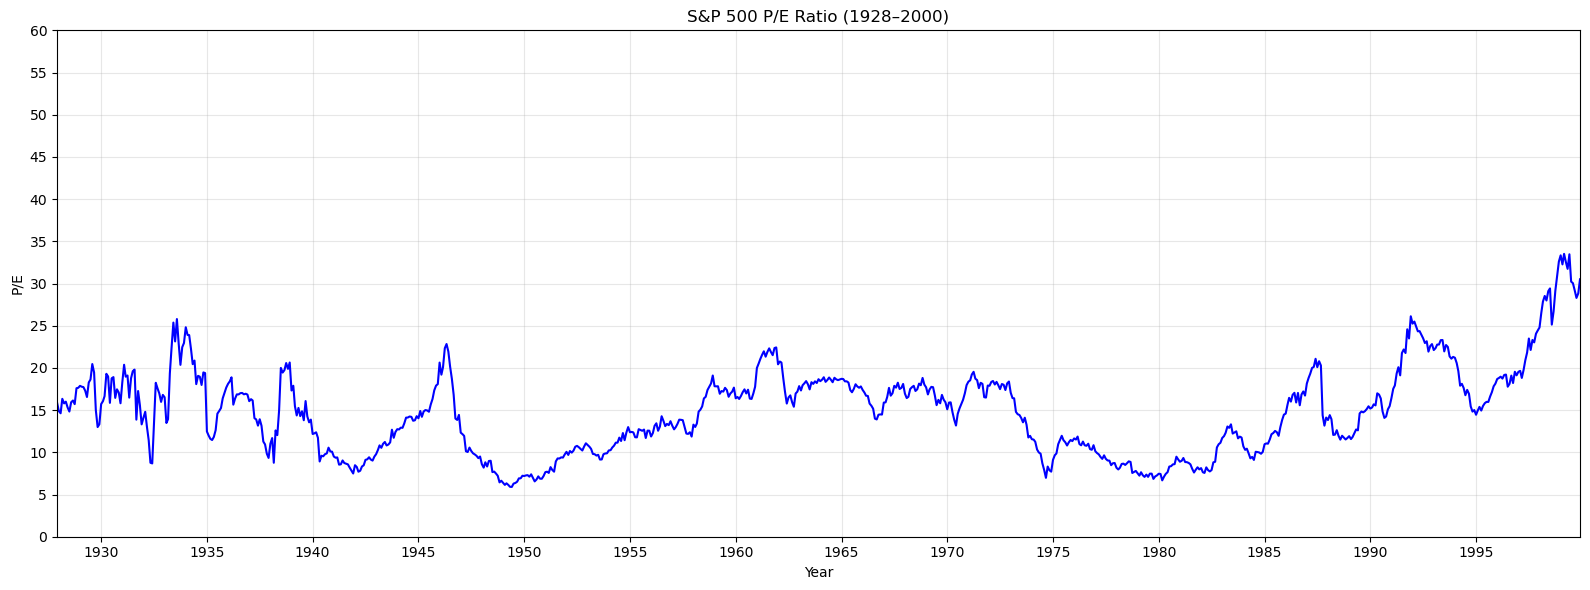

In [9]:
plt.figure(figsize=(16,6))
plt.plot(df_1["date"], df_1["pe"], linewidth=1.5, color='blue')

plt.title("S&P 500 P/E Ratio (1928–2000)")
plt.xlabel("Year")
plt.ylabel("P/E")

plt.ylim(0, 60)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))

plt.xlim(df_1["date"].min(), df_1["date"].max())
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # tick every 5 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

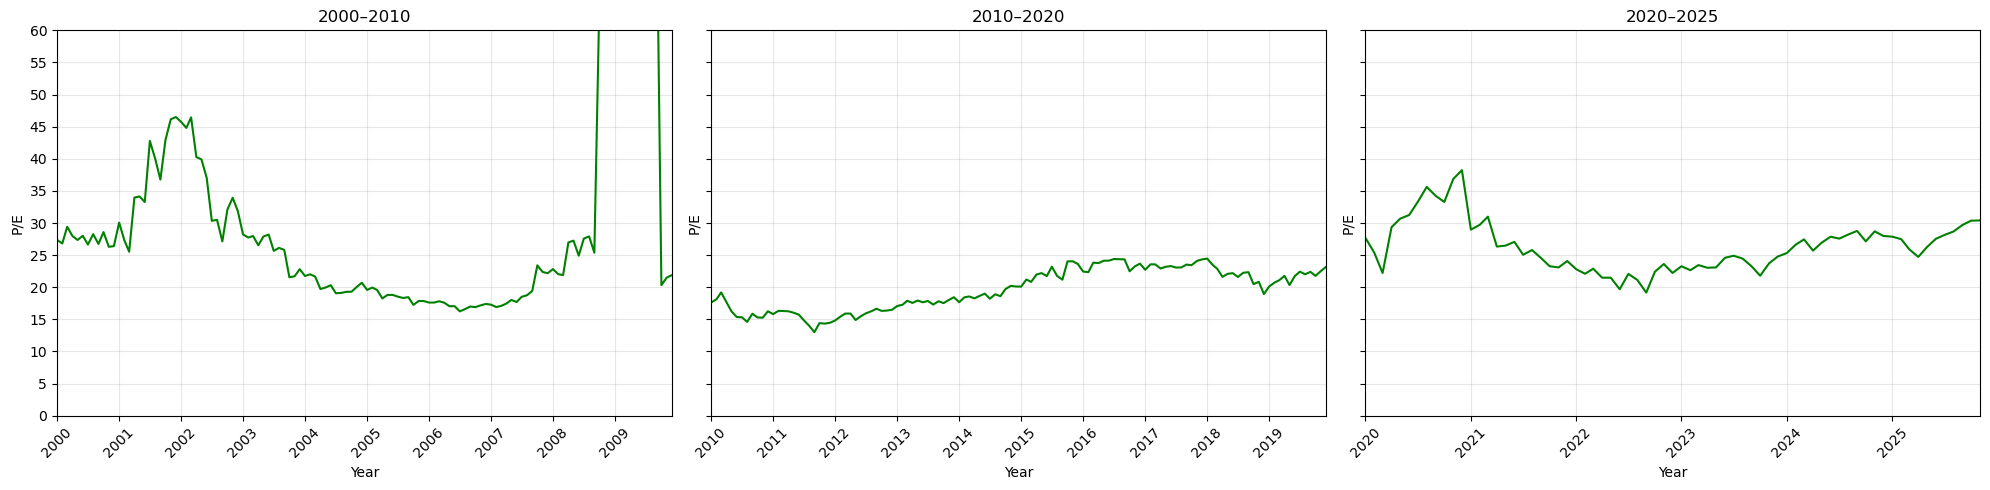

In [11]:
periods = [
    (df_2, "2000–2010"),
    (df_3, "2010–2020"),
    (df_4, "2020–2025")
]

fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)

for ax, (data, title) in zip(axs, periods):
    ax.plot(data["date"], data["pe"], linewidth=1.5, color='green')
    ax.set_title(title)
    
    # Y-axis
    ax.set_ylim(0, 60)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.set_ylabel("P/E")
    
    # X-axis
    ax.set_xlim(data["date"].min(), data["date"].max())
    ax.xaxis.set_major_locator(mdates.YearLocator(1))  # yearly ticks
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.set_xlabel("Year")
    
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
# Period dictionary
periods_dict = {
    "Before 2000": df_1,
    "2000–2010": df_2,
    "2010–2020": df_3,
    "2020–2025": df_4
}

# Create statistics table
stats = pd.DataFrame(columns=["Mean", "Median", "Min", "Max"])

for name, data in periods_dict.items():
    stats.loc[name] = [
        data["pe"].mean(),
        data["pe"].median(),
        data["pe"].min(),
        data["pe"].max()
    ]

print(stats)

                  Mean   Median      Min       Max
Before 2000  14.806338  14.8265   5.9000   33.5167
2000–2010    32.058822  25.6022  16.2487  122.4128
2010–2020    19.674211  20.1110  13.0078   24.4613
2020–2025    26.381413  25.8981  19.1662   38.2297


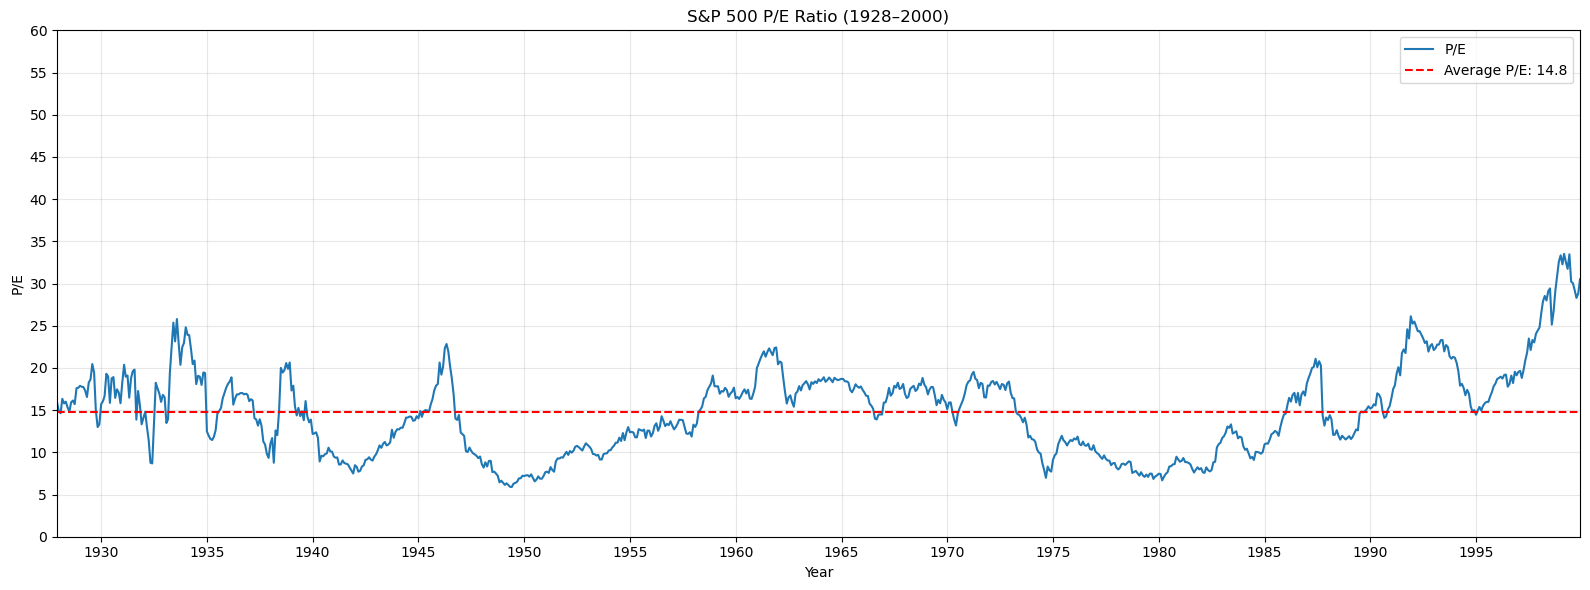

In [15]:
plt.figure(figsize=(16,6))
plt.plot(df_1["date"], df_1["pe"], linewidth=1.5, label="P/E")
mean_pe_1 = df_1["pe"].mean()
plt.axhline(mean_pe_1, color='red', linestyle='--', linewidth=1.5,
            label=f"Average P/E: {mean_pe_1:.1f}")

plt.title("S&P 500 P/E Ratio (1928–2000)")
plt.xlabel("Year")
plt.ylabel("P/E")
plt.ylim(0, 60)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xlim(df_1["date"].min(), df_1["date"].max())
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

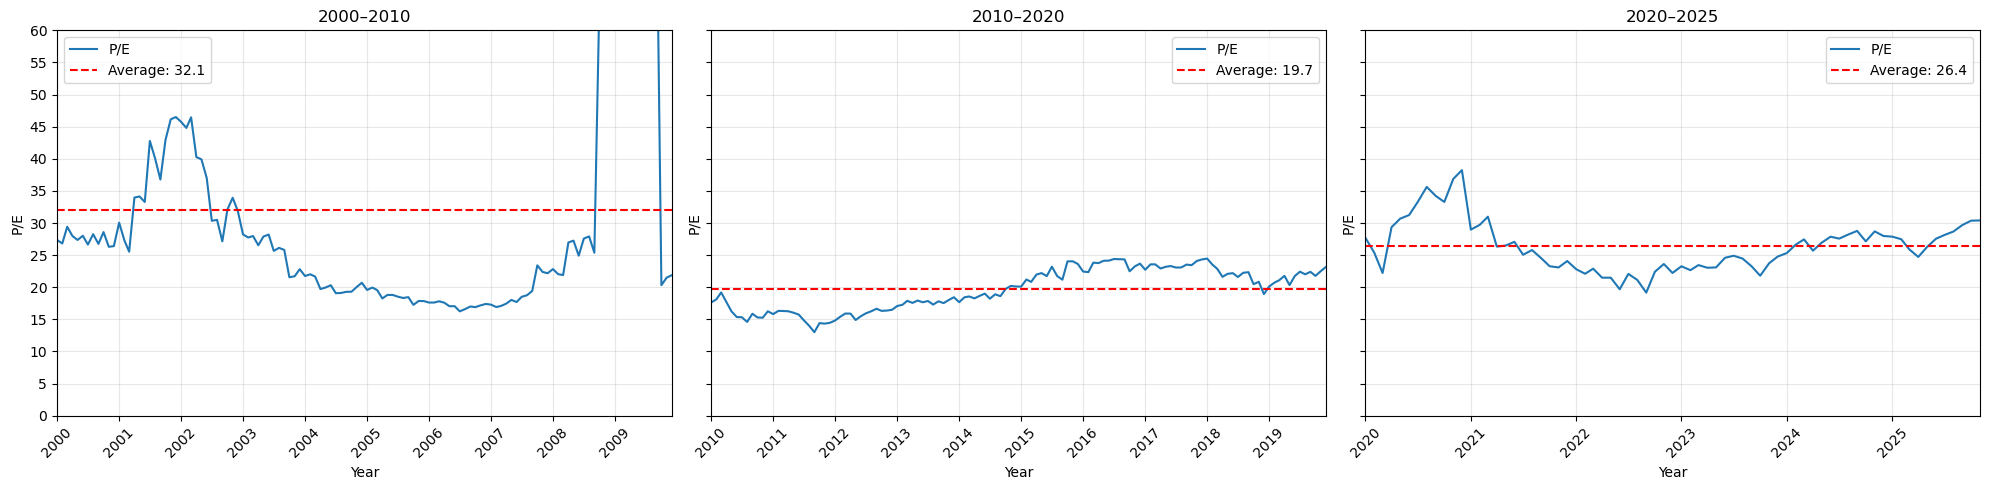

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)

for ax, (name, data) in zip(axs, list(periods_dict.items())[1:]):  # skip "Before 2000"
    ax.plot(data["date"], data["pe"], linewidth=1.5, label="P/E")
    
    mean_pe = data["pe"].mean()
    ax.axhline(mean_pe, color='red', linestyle='--', linewidth=1.5,
               label=f"Average: {mean_pe:.1f}")
    
    ax.set_title(name)
    ax.set_ylim(0, 60)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.set_xlim(data["date"].min(), data["date"].max())
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.set_xlabel("Year")
    ax.set_ylabel("P/E")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.show()

C:\Users\lukas\AppData\Local\Temp\ipykernel_26172\3271400639.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="2000-01-01", end="2025-12-01", interval="1mo")
[*********************100%***********************]  1 of 1 completed


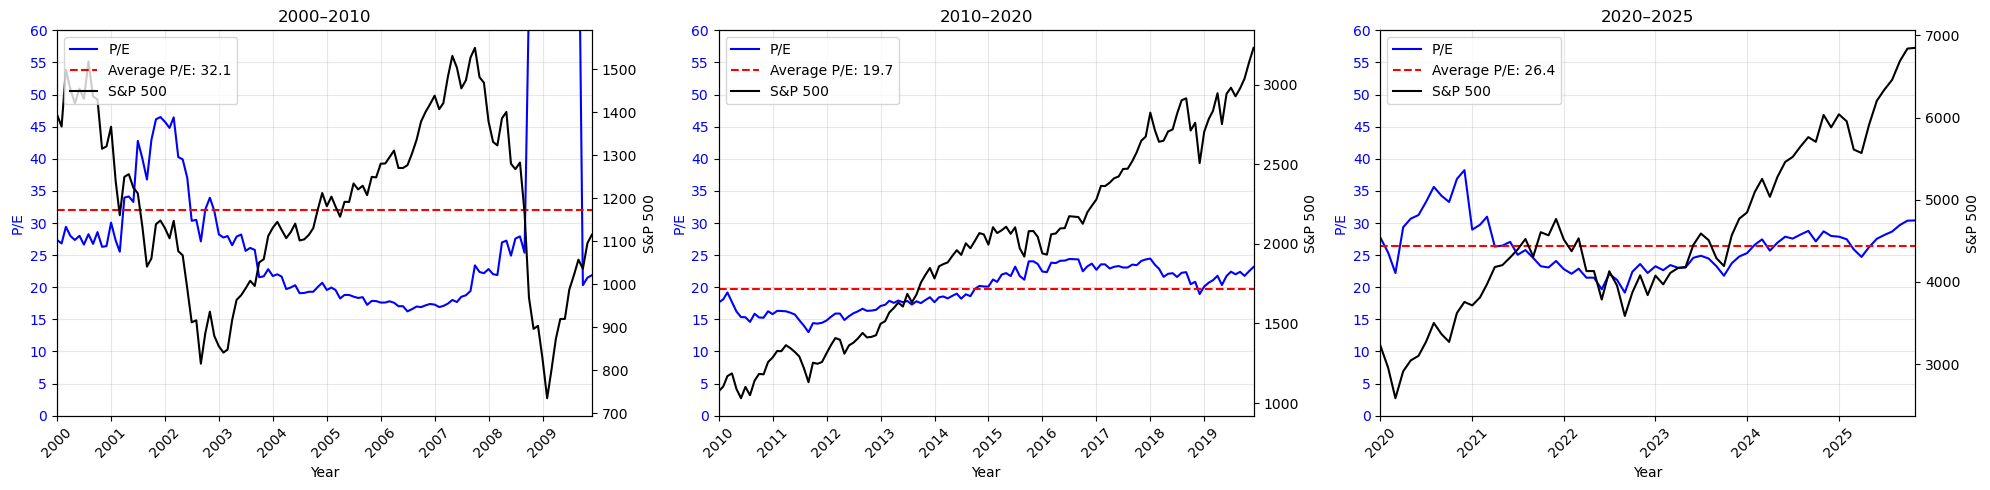

In [19]:
# Download S&P 500 data
sp500 = yf.download("^GSPC", start="2000-01-01", end="2025-12-01", interval="1mo")

# Flatten MultiIndex if present
if isinstance(sp500.columns, pd.MultiIndex):
    sp500.columns = [' '.join(col).strip() for col in sp500.columns.values]

# Reset index
sp500 = sp500.reset_index()

# Ensure closing price column exists and is named 'Close'
if 'Adj Close' in sp500.columns:
    sp500.rename(columns={'Adj Close': 'Close'}, inplace=True)
elif 'Adj Close ^GSPC' in sp500.columns:
    sp500.rename(columns={'Adj Close ^GSPC': 'Close'}, inplace=True)
elif 'Close ^GSPC' in sp500.columns:
    sp500.rename(columns={'Close ^GSPC': 'Close'}, inplace=True)

sp500['Date'] = pd.to_datetime(sp500['Date'])

# Plot three subplots for post-2000 periods
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=False)

for ax, (name, data) in zip(axs, list(periods_dict.items())[1:]):
    # P/E
    ax.plot(data["date"], data["pe"], linewidth=1.5, color='blue', label="P/E")
    
    mean_pe = data["pe"].mean()
    ax.axhline(mean_pe, color='red', linestyle='--', linewidth=1.5,
               label=f"Average P/E: {mean_pe:.1f}")
    
    ax.set_title(name)
    ax.set_ylim(0, 60)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.set_xlim(data["date"].min(), data["date"].max())
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.set_xlabel("Year")
    ax.set_ylabel("P/E", color='blue')
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', labelcolor='blue')
    ax.grid(True, alpha=0.3)
    
    # Secondary Y-axis for S&P 500
    ax2 = ax.twinx()
    sp500_period = sp500[
        (sp500['Date'] >= data["date"].min()) &
        (sp500['Date'] <= data["date"].max())
    ]
    ax2.plot(sp500_period['Date'], sp500_period['Close'],
             color='black', label="S&P 500")
    ax2.set_ylabel("S&P 500", color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    
    # Combined legend
    lines_1, labels_1 = ax.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

In [21]:
# Download S&P 500 data
sp500 = yf.download("^GSPC", start="1927-10-31", end="2025-11-01", progress=True)

C:\Users\lukas\AppData\Local\Temp\ipykernel_26172\1005356757.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="1927-10-31", end="2025-11-01", progress=True)
[*********************100%***********************]  1 of 1 completed


In [23]:
# Flatten MultiIndex (if present)
if isinstance(sp500.columns, pd.MultiIndex):
    sp500.columns = [' '.join(col).strip() for col in sp500.columns.values]

# Reset index so 'Date' becomes a column
sp500 = sp500.reset_index()

# Rename Close column
if 'Close ^GSPC' in sp500.columns:
    sp500.rename(columns={'Close ^GSPC': 'Close'}, inplace=True)
elif 'Adj Close ^GSPC' in sp500.columns:
    sp500.rename(columns={'Adj Close ^GSPC': 'Close'}, inplace=True)

# Date conversion
df['date'] = pd.to_datetime(df['date'])
sp500['Date'] = pd.to_datetime(sp500['Date'])

# Sorting required for merge_asof
df = df.sort_values('date')
sp500 = sp500.sort_values('Date')

# As-of merge
df_merged = pd.merge_asof(
    df,
    sp500[['Date', 'Close']],
    left_on='date',
    right_on='Date',
    direction='backward'
)

# Drop the Date column after merge
df_merged = df_merged.drop(columns=['Date'])

df_merged.head()

,date,pe,Close
0,1927-12-01,15.9099,NaN
1,1928-01-01,14.8898,17.660000
2,1928-02-01,14.6271,17.530001
3,1928-03-01,16.3390,17.299999
4,1928-04-01,15.8000,19.280001


In [25]:
# Remove rows where Close is NaN
df_merged = df_merged.dropna(subset=['Close'])

In [27]:
# Ensure data is sorted by date
df_merged = df_merged.sort_values('date').reset_index(drop=True)

# 1 month → shift by 1 row
df_merged['sp500_after_1M'] = df_merged['Close'].shift(-1)

# 3 months → shift by 3 rows
df_merged['sp500_after_3M'] = df_merged['Close'].shift(-3)

# 1 year → shift by 12 rows
df_merged['sp500_after_1Y'] = df_merged['Close'].shift(-12)

# 5 years → shift by 60 rows
df_merged['sp500_after_5Y'] = df_merged['Close'].shift(-60)

# 10 years → shift by 120 rows
df_merged['sp500_after_10Y'] = df_merged['Close'].shift(-120)

# Check results
df_merged.head()

,date,pe,Close,sp500_after_1M,sp500_after_3M,sp500_after_1Y,sp500_after_5Y,sp500_after_10Y
0,1928-01-01,14.8898,17.660000,17.530001,19.280001,24.350000,6.92,10.55
1,1928-02-01,14.6271,17.530001,17.299999,19.780001,25.840000,6.67,10.89
2,1928-03-01,16.3390,17.299999,19.280001,20.070000,25.830000,5.77,11.46
3,1928-04-01,15.8000,19.280001,19.780001,19.139999,24.879999,5.85,8.91
4,1928-05-01,16.0000,19.780001,20.070000,19.420000,25.990000,8.43,9.78


In [29]:
# Add percentage returns
# 1M
df_merged['pct_change_1M'] = (
    (df_merged['sp500_after_1M'] - df_merged['Close']) / df_merged['Close'] * 100
)

# 3M
df_merged['pct_change_3M'] = (
    (df_merged['sp500_after_3M'] - df_merged['Close']) / df_merged['Close'] * 100
)

# 1Y
df_merged['pct_change_1Y'] = (
    (df_merged['sp500_after_1Y'] - df_merged['Close']) / df_merged['Close'] * 100
)

# 5Y
df_merged['pct_change_5Y'] = (
    (df_merged['sp500_after_5Y'] - df_merged['Close']) / df_merged['Close'] * 100
)

# 10Y
df_merged['pct_change_10Y'] = (
    (df_merged['sp500_after_10Y'] - df_merged['Close']) / df_merged['Close'] * 100
)

# Check results
df_merged.head()

,date,pe,Close,sp500_after_1M,sp500_after_3M,sp500_after_1Y,sp500_after_5Y,sp500_after_10Y,pct_change_1M,pct_change_3M,pct_change_1Y,pct_change_5Y,pct_change_10Y
0,1928-01-01,14.8898,17.660000,17.530001,19.280001,24.350000,6.92,10.55,-0.736122,9.173278,37.882223,-60.815401,-40.260474
1,1928-02-01,14.6271,17.530001,17.299999,19.780001,25.840000,6.67,10.89,-1.312045,12.835139,47.404445,-61.950942,-37.877924
2,1928-03-01,16.3390,17.299999,19.280001,20.070000,25.830000,5.77,11.46,11.445096,16.011564,49.306365,-66.647397,-33.757222
3,1928-04-01,15.8000,19.280001,19.780001,19.139999,24.879999,5.85,8.91,2.593361,-0.726148,29.045634,-69.657678,-53.786309
4,1928-05-01,16.0000,19.780001,20.070000,19.420000,25.990000,8.43,9.78,1.466122,-1.820023,31.395343,-57.381193,-50.556120


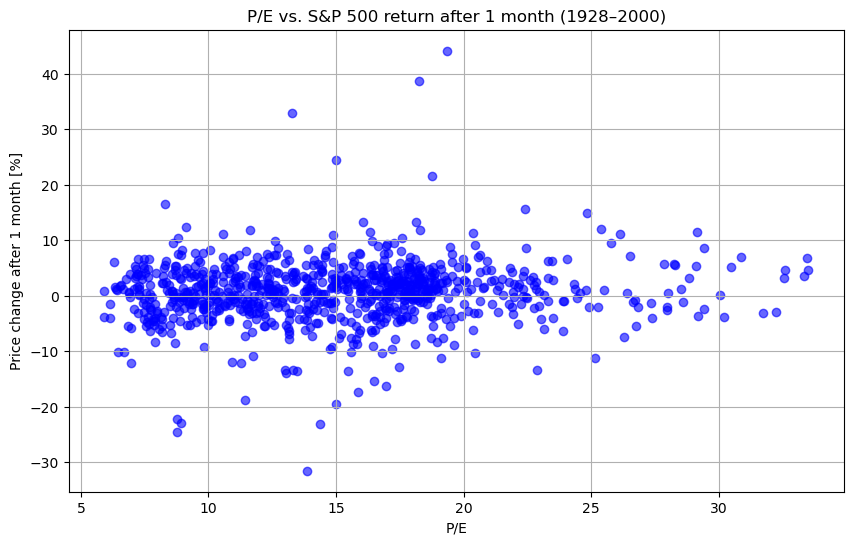

In [31]:
# Filter period 1928–2000
df_scatter = df_merged[
    (df_merged['date'] >= '1928-01-01') &
    (df_merged['date'] <= '2000-12-31')
]

plt.figure(figsize=(10,6))
plt.scatter(df_scatter['pe'], df_scatter['pct_change_1M'],
            color='blue', alpha=0.6)

plt.title('P/E vs. S&P 500 return after 1 month (1928–2000)')
plt.xlabel('P/E')
plt.ylabel('Price change after 1 month [%]')
plt.grid(True)
plt.show()

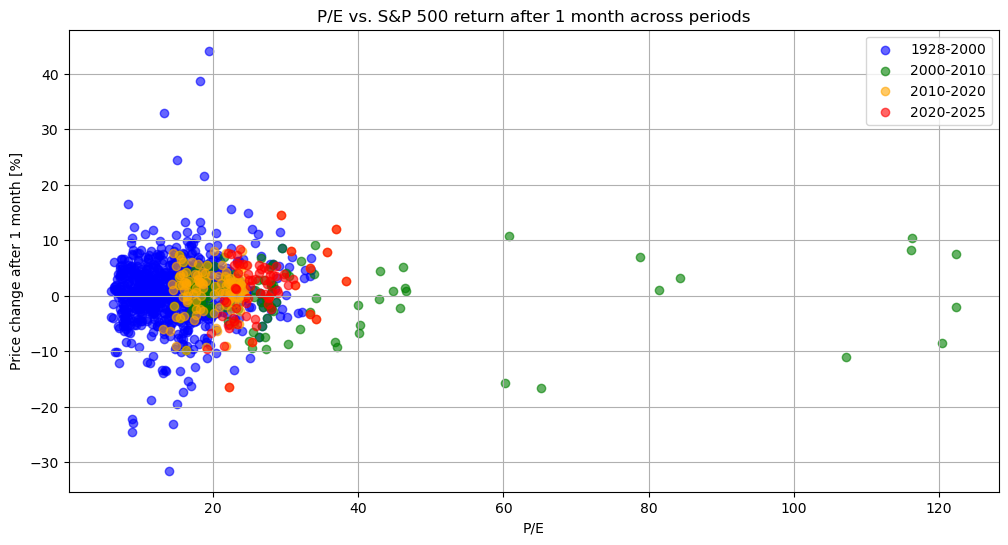

In [33]:
# Define periods and colors
periods = {
    '1928-2000': ('1928-01-01', '2000-12-31', 'blue'),
    '2000-2010': ('2000-01-01', '2010-12-31', 'green'),
    '2010-2020': ('2010-01-01', '2020-12-31', 'orange'),
    '2020-2025': ('2020-01-01', '2025-11-01', 'red')
}

plt.figure(figsize=(12,6))

for label, (start, end, color) in periods.items():
    df_period = df_merged[
        (df_merged['date'] >= start) &
        (df_merged['date'] <= end)
    ]
    plt.scatter(df_period['pe'], df_period['pct_change_1M'],
                color=color, alpha=0.6, label=label)

plt.title('P/E vs. S&P 500 return after 1 month across periods')
plt.xlabel('P/E')
plt.ylabel('Price change after 1 month [%]')
plt.grid(True)
plt.legend()
plt.show()

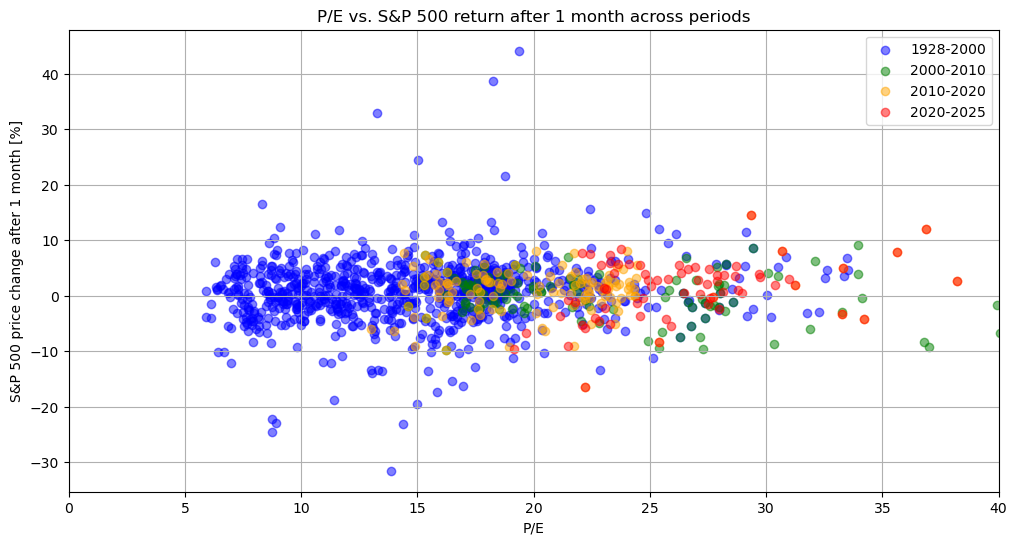

In [35]:
plt.figure(figsize=(12,6))

# Dictionary to store average returns
mean_returns = {}

for label, (start, end, color) in periods.items():
    df_period = df_merged[
        (df_merged['date'] >= start) &
        (df_merged['date'] <= end)
    ]
    
    plt.scatter(df_period['pe'], df_period['pct_change_1M'],
                color=color, alpha=0.5, label=label)
    
    # Average 1M return
    mean_returns[label] = df_period['pct_change_1M'].mean()

plt.title('P/E vs. S&P 500 return after 1 month across periods')
plt.xlabel('P/E')
plt.ylabel('S&P 500 price change after 1 month [%]')
plt.xlim(0, 40)
plt.grid(True)
plt.legend()
plt.show()

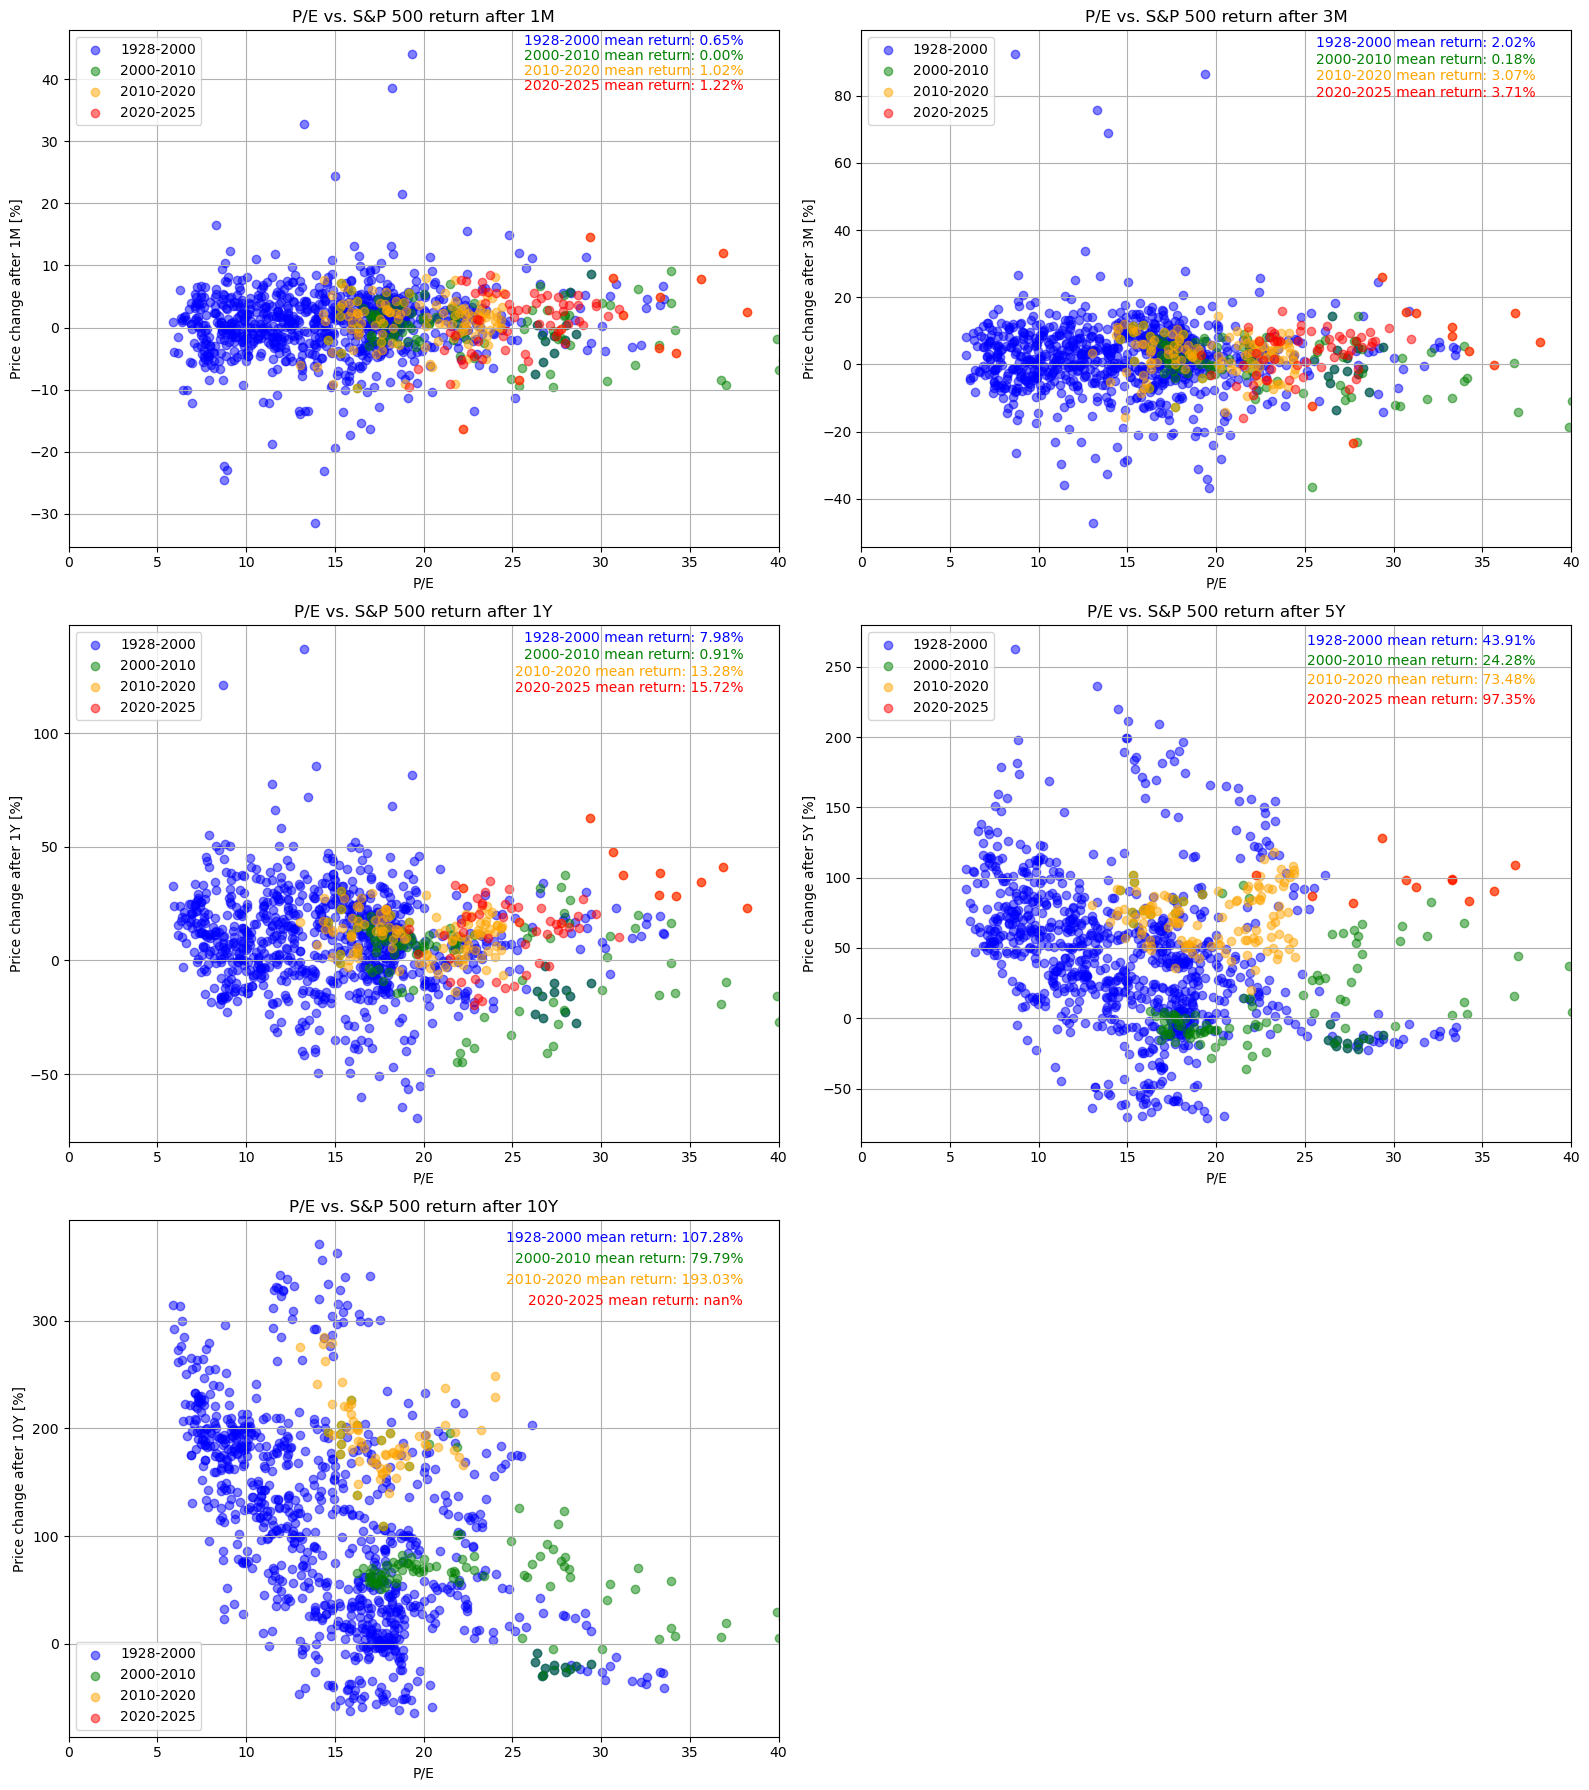

In [37]:
# Horizons and corresponding columns
horizons = {
    '1M': 'pct_change_1M',
    '3M': 'pct_change_3M',
    '1Y': 'pct_change_1Y',
    '5Y': 'pct_change_5Y',
    '10Y': 'pct_change_10Y'
}

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for i, (label_h, col) in enumerate(horizons.items()):
    ax = axes[i]
    mean_returns = {}
    
    for period_label, (start, end, color) in periods.items():
        df_period = df_merged[
            (df_merged['date'] >= start) &
            (df_merged['date'] <= end)
        ]
        
        ax.scatter(df_period['pe'], df_period[col],
                   color=color, alpha=0.5, label=period_label)
        
        mean_returns[period_label] = df_period[col].mean()
    
    ax.set_title(f'P/E vs. S&P 500 return after {label_h}')
    ax.set_xlabel('P/E')
    ax.set_ylabel(f'Price change after {label_h} [%]')
    ax.set_xlim(0, 40)
    ax.grid(True)
    
    # Average return text (top-right corner)
    text_y = ax.get_ylim()[1] * 0.95
    for j, (period_label, mean_val) in enumerate(mean_returns.items()):
        ax.text(
            0.95 * 40,
            text_y - j * 0.05 * ax.get_ylim()[1],
            f'{period_label} mean return: {mean_val:.2f}%',
            color=periods[period_label][2],
            horizontalalignment='right'
        )
    
    ax.legend()

# Remove last subplot if unused
if len(horizons) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

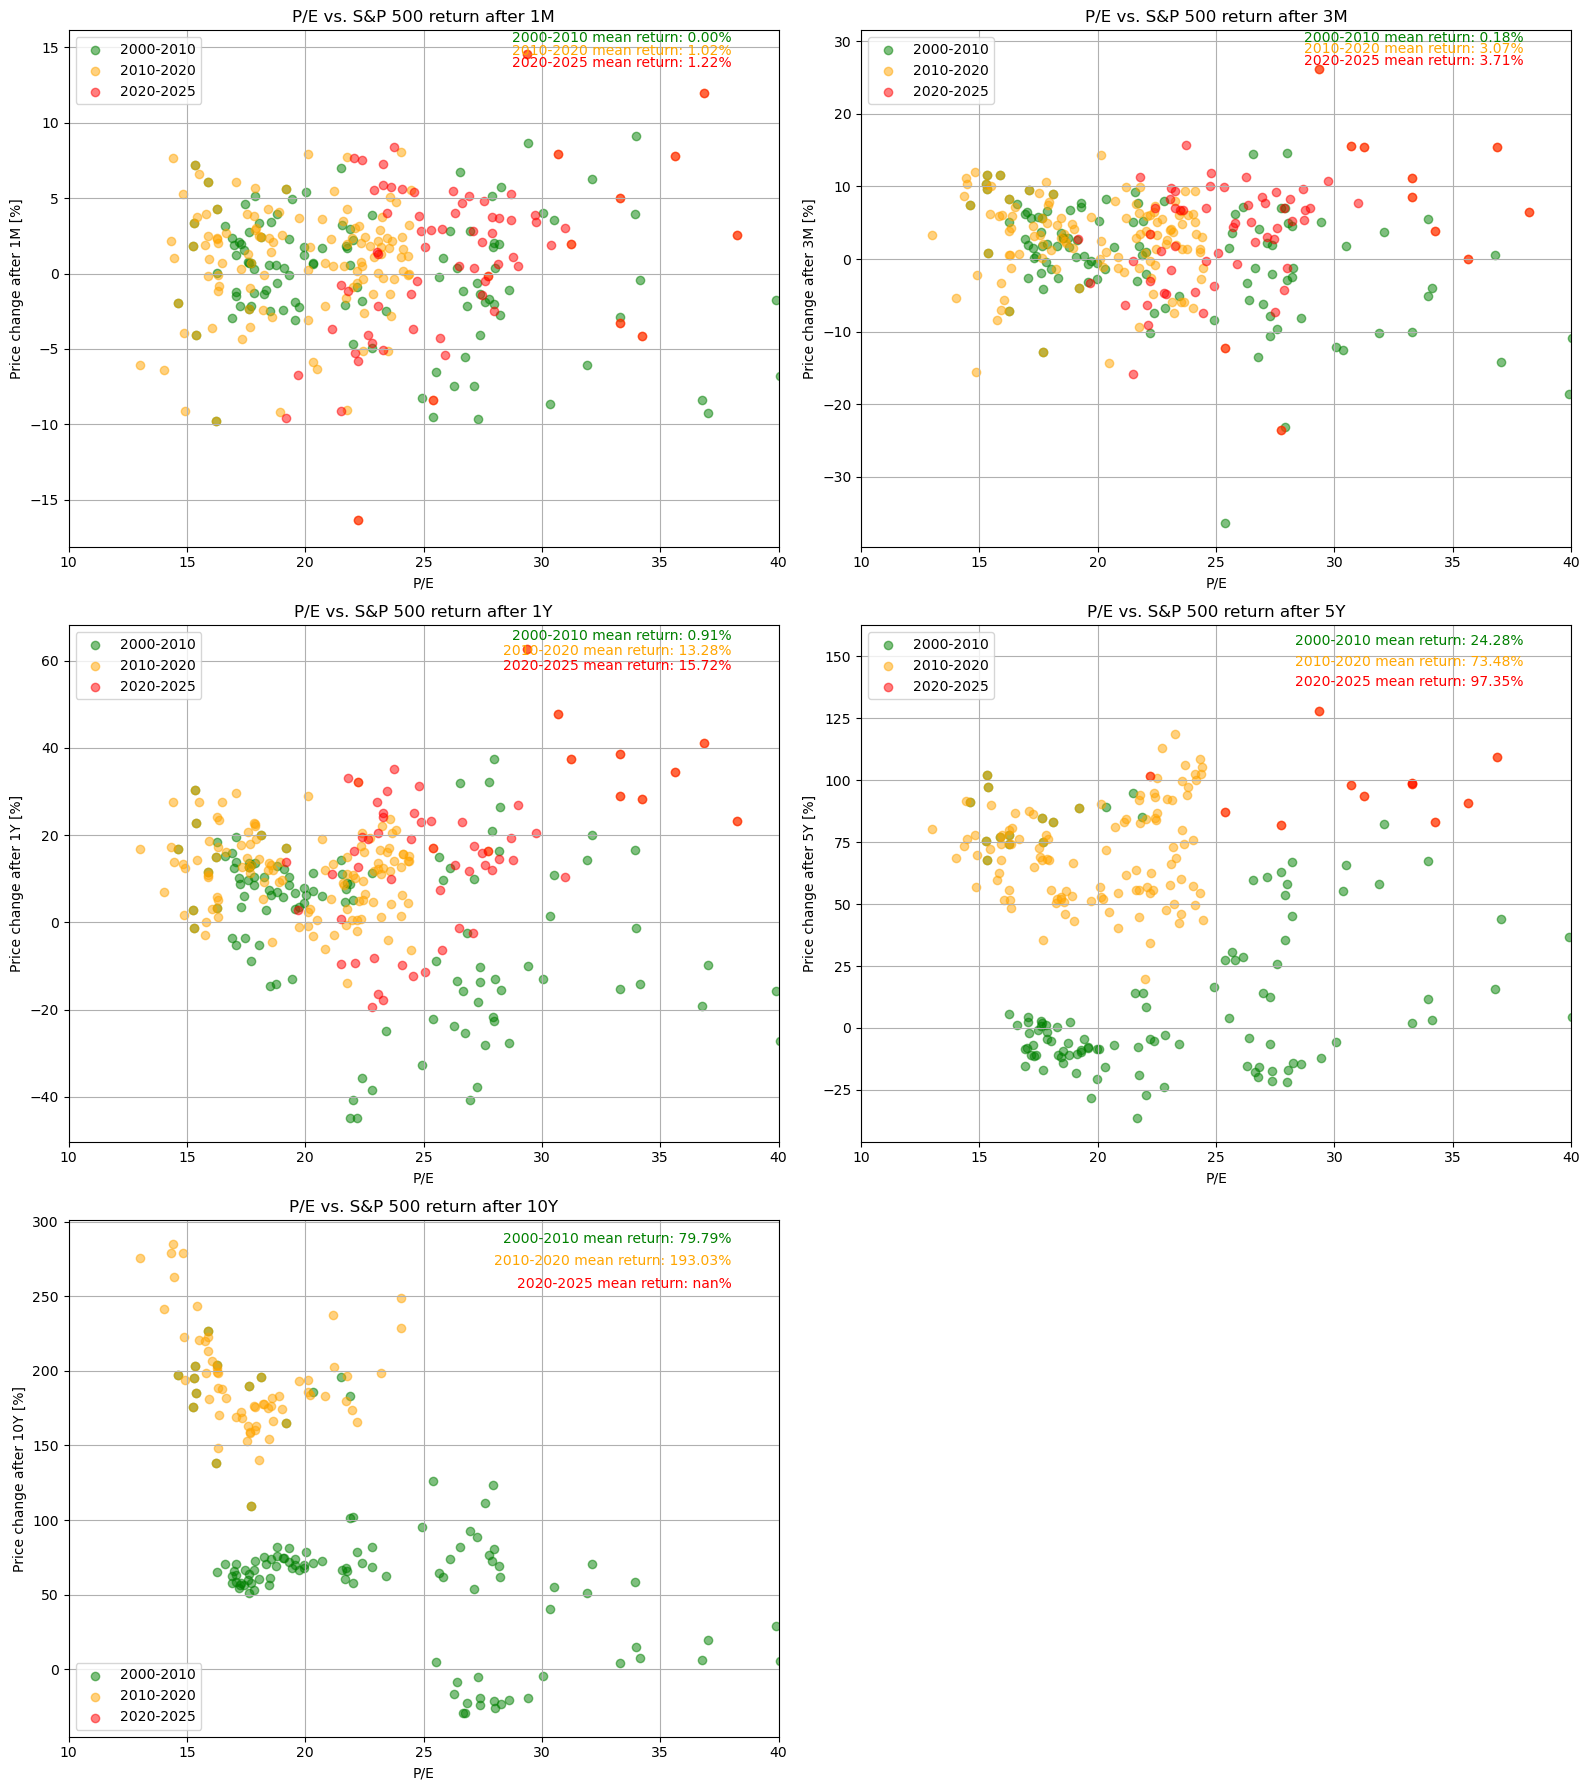

In [39]:
# Horizons and corresponding columns
horizons = {
    '1M': 'pct_change_1M',
    '3M': 'pct_change_3M',
    '1Y': 'pct_change_1Y',
    '5Y': 'pct_change_5Y',
    '10Y': 'pct_change_10Y'
}

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for i, (label_h, col) in enumerate(horizons.items()):
    ax = axes[i]
    mean_returns = {}
    
    for period_label, (start, end, color) in periods.items():
        if period_label == '1928-2000':
            continue  # Skip this period
        
        df_period = df_merged[
            (df_merged['date'] >= start) &
            (df_merged['date'] <= end)
        ]
        
        ax.scatter(df_period['pe'], df_period[col],
                   color=color, alpha=0.5, label=period_label)
        
        mean_returns[period_label] = df_period[col].mean()
    
    ax.set_title(f'P/E vs. S&P 500 return after {label_h}')
    ax.set_xlabel('P/E')
    ax.set_ylabel(f'Price change after {label_h} [%]')
    ax.set_xlim(10, 40)
    ax.grid(True)
    
    text_y = ax.get_ylim()[1] * 0.95
    for j, (period_label, mean_val) in enumerate(mean_returns.items()):
        ax.text(
            0.95 * 40,
            text_y - j * 0.05 * ax.get_ylim()[1],
            f'{period_label} mean return: {mean_val:.2f}%',
            color=periods[period_label][2],
            horizontalalignment='right'
        )
    
    ax.legend()

if len(horizons) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

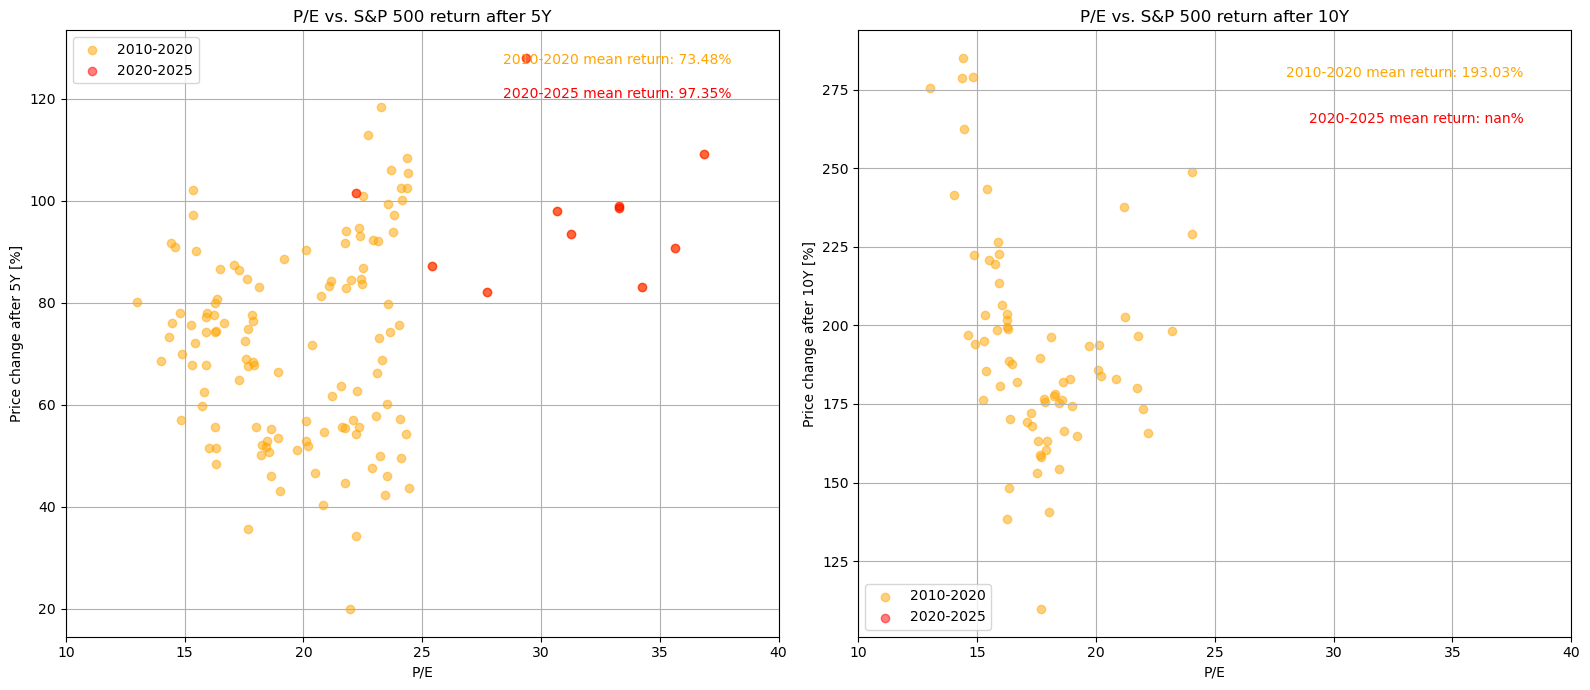

In [41]:
# Horizons to display
horizons = {
    '5Y': 'pct_change_5Y',
    '10Y': 'pct_change_10Y'
}

# Selected periods
selected_periods = {
    k: v for k, v in periods.items()
    if k in ['2010-2020', '2020-2025']
}

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
axes = axes.flatten()

for i, (label_h, col) in enumerate(horizons.items()):
    ax = axes[i]
    mean_returns = {}
    
    for period_label, (start, end, color) in selected_periods.items():
        df_period = df_merged[
            (df_merged['date'] >= start) &
            (df_merged['date'] <= end)
        ]
        
        ax.scatter(df_period['pe'], df_period[col],
                   color=color, alpha=0.5, label=period_label)
        
        mean_returns[period_label] = df_period[col].mean()
    
    ax.set_title(f'P/E vs. S&P 500 return after {label_h}')
    ax.set_xlabel('P/E')
    ax.set_ylabel(f'Price change after {label_h} [%]')
    ax.set_xlim(10, 40)
    ax.grid(True)
    
    text_y = ax.get_ylim()[1] * 0.95
    for j, (period_label, mean_val) in enumerate(mean_returns.items()):
        ax.text(
            0.95 * 40,
            text_y - j * 0.05 * ax.get_ylim()[1],
            f'{period_label} mean return: {mean_val:.2f}%',
            color=selected_periods[period_label][2],
            horizontalalignment='right'
        )
    
    ax.legend()

plt.tight_layout()
plt.show()

In [43]:
# Download data from multpl.com
url = "https://www.multpl.com/s-p-500-price-to-sales/table/by-quarter"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, "html.parser")

# Extract HTML table
table = soup.find("table")
sp_ps = pd.read_html(str(table))[0]

# Clean Value column
sp_ps["Value"] = (
    sp_ps["Value"]
    .astype(str)
    .str.replace("†", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)
sp_ps["Value"] = pd.to_numeric(sp_ps["Value"], errors="coerce")

# Date conversion
sp_ps["Date"] = pd.to_datetime(sp_ps["Date"], errors="coerce")

# Sort ascending (oldest → newest)
sp_ps = sp_ps.sort_values("Date").reset_index(drop=True)

# Remove observations after 2025-09-30
sp_ps = sp_ps[sp_ps["Date"] <= "2025-09-30"]

# Reset index
sp_ps = sp_ps.reset_index(drop=True)

print(sp_ps.tail())

         Date  Value
95 2024-09-30   2.95
96 2024-12-31   2.98
97 2025-03-31   2.82
98 2025-06-30   3.08
99 2025-09-30   3.32


C:\Users\lukas\AppData\Local\Temp\ipykernel_26172\2004574081.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  sp_ps = pd.read_html(str(table))[0]


In [45]:
sp_ps.head()

,Date,Value
0,2000-12-31,1.77
1,2001-03-31,1.54
2,2001-06-30,1.64
3,2001-09-30,1.41
4,2001-12-31,1.56


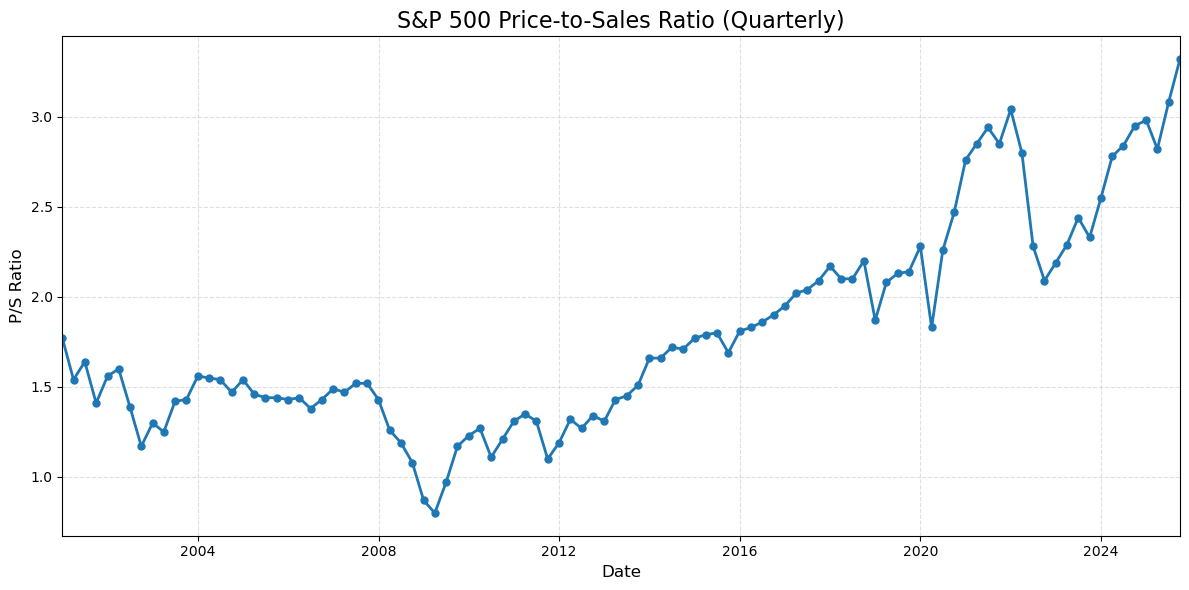

In [47]:
# Filter data starting from 2000-12-31
start_date = pd.to_datetime("2000-12-31")
sp_ps_plot = sp_ps[sp_ps["Date"] >= start_date].copy()

plt.figure(figsize=(12, 6))

plt.plot(
    sp_ps_plot["Date"],
    sp_ps_plot["Value"],
    marker="o",
    markersize=5,
    linewidth=2,
    color="#1f77b4"
)

plt.title("S&P 500 Price-to-Sales Ratio (Quarterly)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("P/S Ratio", fontsize=12)

plt.grid(True, which="both", linestyle="--", alpha=0.4)

# Remove empty space on the left side
plt.xlim(sp_ps_plot["Date"].min(), sp_ps_plot["Date"].max())

plt.tight_layout()
plt.show()

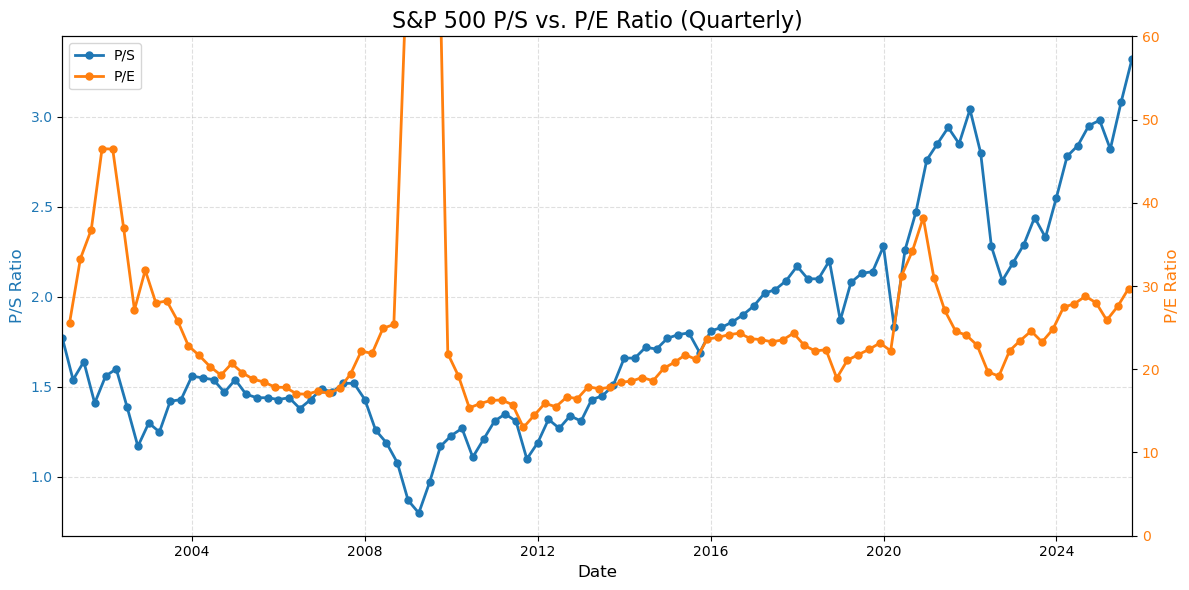

In [49]:
# Filter from 2000-12-31
start_date = pd.to_datetime("2000-12-31")

# P/S
sp_ps_plot = sp_ps[sp_ps["Date"] >= start_date].copy()

# P/E – quarterly data only
df_plot = df[pd.to_datetime(df["date"]) >= start_date].copy()
df_plot["date"] = pd.to_datetime(df_plot["date"])

# Keep only quarter-end months (Mar, Jun, Sep, Dec)
df_plot = df_plot[df_plot["date"].dt.month.isin([3, 6, 9, 12])]

# Dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary axis: P/S
ax1.plot(
    sp_ps_plot["Date"],
    sp_ps_plot["Value"],
    marker="o",
    markersize=5,
    linewidth=2,
    color="#1f77b4",
    label="P/S"
)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("P/S Ratio", fontsize=12, color="#1f77b4")
ax1.tick_params(axis="y", labelcolor="#1f77b4")
ax1.grid(True, which="both", linestyle="--", alpha=0.4)

# Secondary axis: P/E
ax2 = ax1.twinx()
ax2.plot(
    df_plot["date"],
    df_plot["pe"],
    marker="o",
    markersize=5,
    linewidth=2,
    color="#ff7f0e",
    label="P/E"
)
ax2.set_ylabel("P/E Ratio", fontsize=12, color="#ff7f0e")
ax2.tick_params(axis="y", labelcolor="#ff7f0e")
ax2.set_ylim(0, 60)

ax1.set_xlim(sp_ps_plot["Date"].min(), sp_ps_plot["Date"].max())

plt.title("S&P 500 P/S vs. P/E Ratio (Quarterly)", fontsize=16)

# Merge legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.tight_layout()
plt.show()

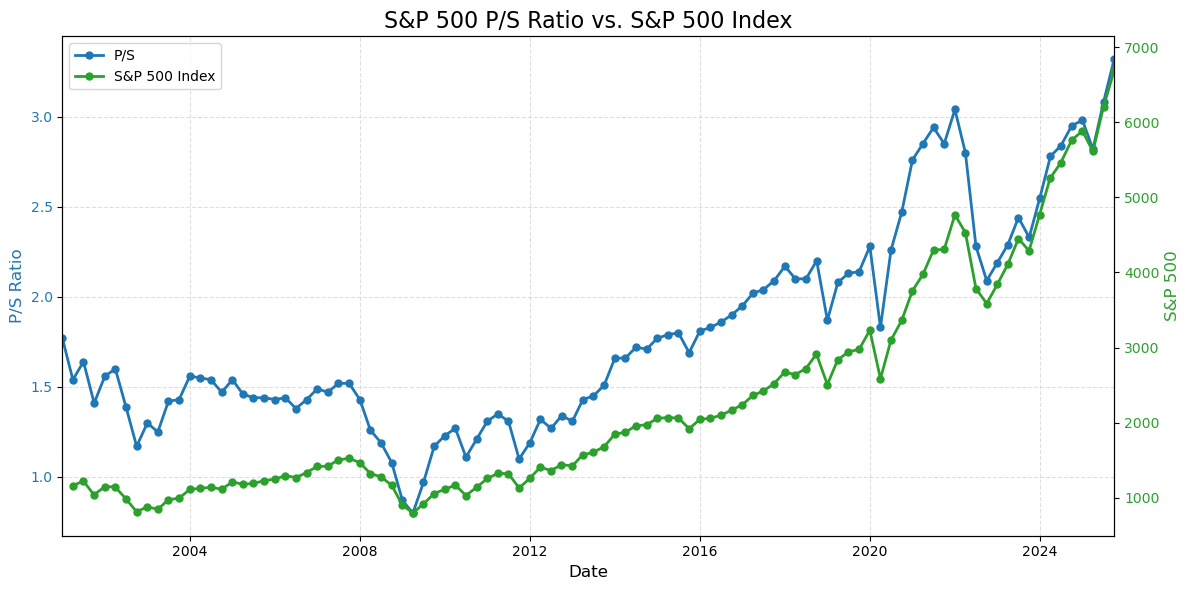

In [51]:
# Filter from 2000-12-31
start_date = pd.to_datetime("2000-12-31")

# P/S
sp_ps_plot = sp_ps[sp_ps["Date"] >= start_date].copy()

# S&P 500 – last trading day of each quarter
sp500_plot = sp500[sp500["Date"] >= start_date].copy()
sp500_plot["Date"] = pd.to_datetime(sp500_plot["Date"])
sp500_plot = (
    sp500_plot
    .groupby([sp500_plot["Date"].dt.year, sp500_plot["Date"].dt.quarter])
    .last()
    .reset_index(drop=True)
)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Primary axis: P/S
ax1.plot(
    sp_ps_plot["Date"],
    sp_ps_plot["Value"],
    marker="o",
    markersize=5,
    linewidth=2,
    color="#1f77b4",
    label="P/S"
)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("P/S Ratio", fontsize=12, color="#1f77b4")
ax1.tick_params(axis="y", labelcolor="#1f77b4")
ax1.grid(True, which="both", linestyle="--", alpha=0.4)

# Secondary axis: S&P 500 Index
ax2 = ax1.twinx()
ax2.plot(
    sp500_plot["Date"],
    sp500_plot["Close"],
    marker="o",
    markersize=5,
    linewidth=2,
    color="#2ca02c",
    label="S&P 500 Index"
)
ax2.set_ylabel("S&P 500", fontsize=12, color="#2ca02c")
ax2.tick_params(axis="y", labelcolor="#2ca02c")

ax1.set_xlim(sp_ps_plot["Date"].min(), sp_ps_plot["Date"].max())

plt.title("S&P 500 P/S Ratio vs. S&P 500 Index", fontsize=16)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.tight_layout()
plt.show()

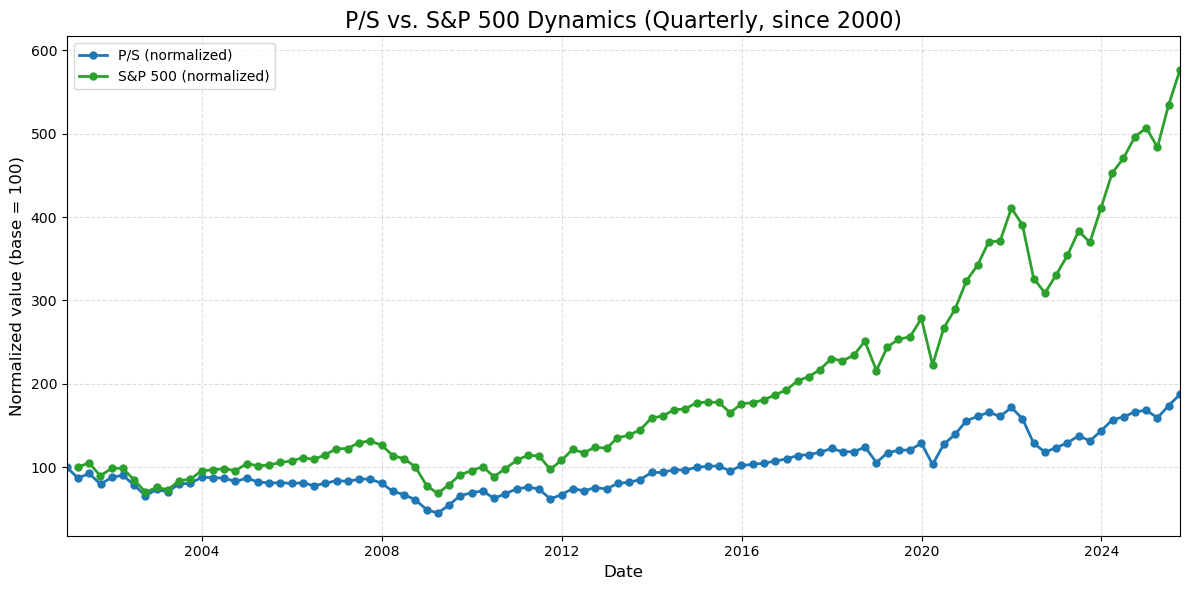

In [53]:
# Normalization to base value = 100
sp_ps_plot["Value_norm"] = sp_ps_plot["Value"] / sp_ps_plot["Value"].iloc[0] * 100
sp500_plot["Close_norm"] = sp500_plot["Close"] / sp500_plot["Close"].iloc[0] * 100

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(
    sp_ps_plot["Date"],
    sp_ps_plot["Value_norm"],
    marker="o",
    markersize=5,
    linewidth=2,
    color="#1f77b4",
    label="P/S (normalized)"
)

ax.plot(
    sp500_plot["Date"],
    sp500_plot["Close_norm"],
    marker="o",
    markersize=5,
    linewidth=2,
    color="#2ca02c",
    label="S&P 500 (normalized)"
)

ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Normalized value (base = 100)", fontsize=12)
ax.grid(True, which="both", linestyle="--", alpha=0.4)
ax.set_xlim(sp_ps_plot["Date"].min(), sp_ps_plot["Date"].max())

plt.title("P/S vs. S&P 500 Dynamics (Quarterly, since 2000)", fontsize=16)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

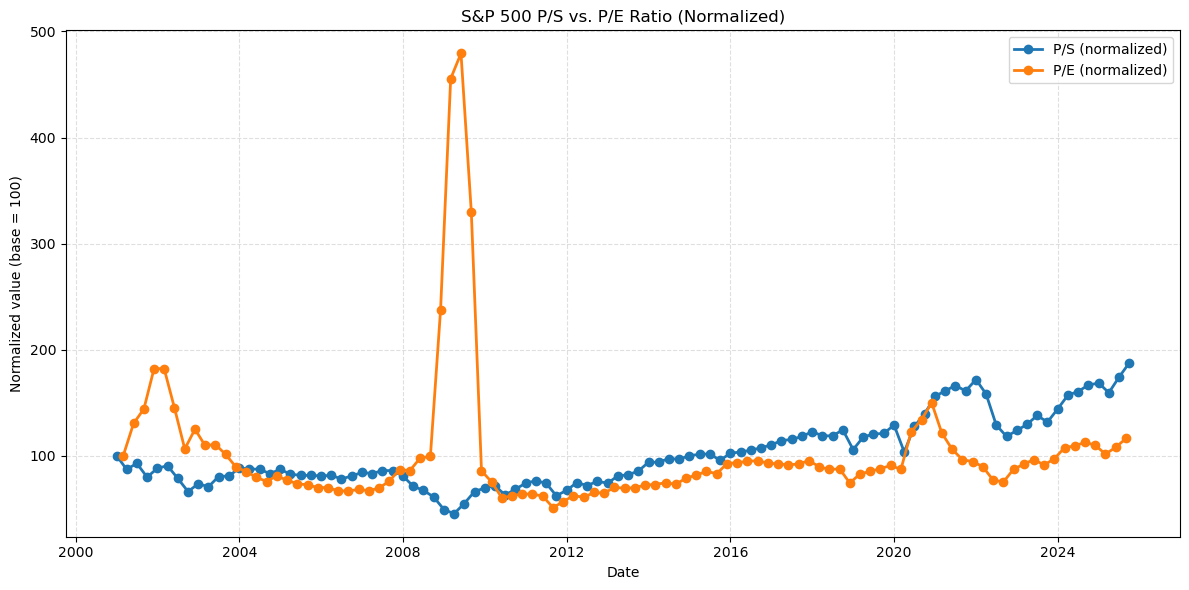

In [55]:
# Normalize P/S and P/E
sp_ps_plot = sp_ps_plot.sort_values("Date").reset_index(drop=True)
sp_ps_plot["Value_norm"] = sp_ps_plot["Value"] / sp_ps_plot["Value"].iloc[0] * 100

df_plot = df[pd.to_datetime(df["date"]) >= start_date].copy()
df_plot["date"] = pd.to_datetime(df_plot["date"])
df_plot = df_plot[df_plot["date"].dt.month.isin([3, 6, 9, 12])]
df_plot = df_plot.sort_values("date").reset_index(drop=True)
df_plot["pe_norm"] = df_plot["pe"] / df_plot["pe"].iloc[0] * 100

plt.figure(figsize=(12, 6))

plt.plot(
    sp_ps_plot["Date"],
    sp_ps_plot["Value_norm"],
    marker="o",
    linewidth=2,
    label="P/S (normalized)"
)

plt.plot(
    df_plot["date"],
    df_plot["pe_norm"],
    marker="o",
    linewidth=2,
    label="P/E (normalized)"
)

plt.xlabel("Date")
plt.ylabel("Normalized value (base = 100)")
plt.title("S&P 500 P/S vs. P/E Ratio (Normalized)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

In [57]:
# Download sales growth data
url = "https://www.multpl.com/s-p-500-sales-growth/table/by-quarter"
df = pd.read_html(url, header=0)[0]
df.columns = ["Date", "sales_growth_per_share_pct"]

df["Date"] = pd.to_datetime(df["Date"])
df["sales_growth_per_share_pct"] = (
    df["sales_growth_per_share_pct"]
    .str.replace("%", "", regex=False)
    .astype(float)
)

sales_per_share = df.copy()

In [59]:
print(sales_per_share.head())

        Date  sales_growth_per_share_pct
0 2025-06-30                        4.83
1 2025-03-31                        4.98
2 2024-12-31                        5.25
3 2024-09-30                        5.89
4 2024-06-30                        5.38


In [61]:
# Year-over-year shift
sales_per_share["sales_growth_per_share_yoy"] = (
    sales_per_share["sales_growth_per_share_pct"].shift(4)
)

In [63]:
print(sales_per_share)

         Date  sales_growth_per_share_pct  sales_growth_per_share_yoy
0  2025-06-30                        4.83                         NaN
1  2025-03-31                        4.98                         NaN
2  2024-12-31                        5.25                         NaN
3  2024-09-30                        5.89                         NaN
4  2024-06-30                        5.38                        4.83
..        ...                         ...                         ...
90 2002-12-31                       -8.45                        5.37
91 2002-09-30                       -5.56                        0.02
92 2002-06-30                       -5.07                       -3.64
93 2002-03-31                       -4.43                       -5.49
94 2001-12-31                       -1.18                       -8.45

[95 rows x 3 columns]


In [65]:
# Forecast values
forecasts = {
    "2024-09-30": 8.4,
    "2024-12-31": 7.3,
    "2025-03-31": 7.9,
    "2025-06-30": 7.0
}

sales_per_share["Date_str"] = sales_per_share["Date"].dt.strftime("%Y-%m-%d")

sales_per_share["sales_growth_per_share_yoy"] = sales_per_share.apply(
    lambda row: forecasts[row["Date_str"]]
    if row["Date_str"] in forecasts
    else row["sales_growth_per_share_yoy"],
    axis=1
)

sales_per_share.drop(columns=["Date_str"], inplace=True)

In [67]:
sales_per_share.head()

,Date,sales_growth_per_share_pct,sales_growth_per_share_yoy
0,2025-06-30,4.83,7.00
1,2025-03-31,4.98,7.90
2,2024-12-31,5.25,7.30
3,2024-09-30,5.89,8.40
4,2024-06-30,5.38,4.83


In [69]:
# Merge with valuation data
sales_per_share["Date_shifted"] = sales_per_share["Date"] + timedelta(days=1)

peg_df = pd.merge(
    df_merged,
    sales_per_share[["Date_shifted", "sales_growth_per_share_yoy"]],
    left_on="date",
    right_on="Date_shifted",
    how="left"
)

peg_df["PEG"] = peg_df["pe"] / peg_df["sales_growth_per_share_yoy"]
peg_df.sort_values("date", inplace=True)

In [71]:
peg_df.head()

,date,pe,Close,sp500_after_1M,sp500_after_3M,sp500_after_1Y,sp500_after_5Y,sp500_after_10Y,pct_change_1M,pct_change_3M,pct_change_1Y,pct_change_5Y,pct_change_10Y,Date_shifted,sales_growth_per_share_yoy,PEG
0,1928-01-01,14.8898,17.660000,17.530001,19.280001,24.350000,6.92,10.55,-0.736122,9.173278,37.882223,-60.815401,-40.260474,NaT,NaN,NaN
1,1928-02-01,14.6271,17.530001,17.299999,19.780001,25.840000,6.67,10.89,-1.312045,12.835139,47.404445,-61.950942,-37.877924,NaT,NaN,NaN
2,1928-03-01,16.3390,17.299999,19.280001,20.070000,25.830000,5.77,11.46,11.445096,16.011564,49.306365,-66.647397,-33.757222,NaT,NaN,NaN
3,1928-04-01,15.8000,19.280001,19.780001,19.139999,24.879999,5.85,8.91,2.593361,-0.726148,29.045634,-69.657678,-53.786309,NaT,NaN,NaN
4,1928-05-01,16.0000,19.780001,20.070000,19.420000,25.990000,8.43,9.78,1.466122,-1.820023,31.395343,-57.381193,-50.556120,NaT,NaN,NaN


In [73]:
peg_filtered = peg_df[peg_df["sales_growth_per_share_yoy"].notna()].copy()
peg_filtered["PEG"] = peg_filtered["pe"] / peg_filtered["sales_growth_per_share_yoy"]
peg_filtered = peg_filtered[["Date_shifted", "pe", "sales_growth_per_share_yoy", "PEG"]]
print(peg_filtered)

     Date_shifted       pe  sales_growth_per_share_yoy          PEG
888    2002-01-01  45.7571                       -8.45    -5.415041
891    2002-04-01  40.2737                       -5.49    -7.335829
894    2002-07-01  30.3469                       -3.64    -8.337060
897    2002-10-01  32.1044                        0.02  1605.220000
900    2003-01-01  28.2223                        5.37     5.255549
...           ...      ...                         ...          ...
1158   2024-07-01  27.5743                        4.83     5.708965
1161   2024-10-01  27.1468                        8.40     3.231762
1164   2025-01-01  27.8764                        7.30     3.818685
1167   2025-04-01  24.7217                        7.90     3.129329
1170   2025-07-01  28.1413                        7.00     4.020186

[95 rows x 4 columns]


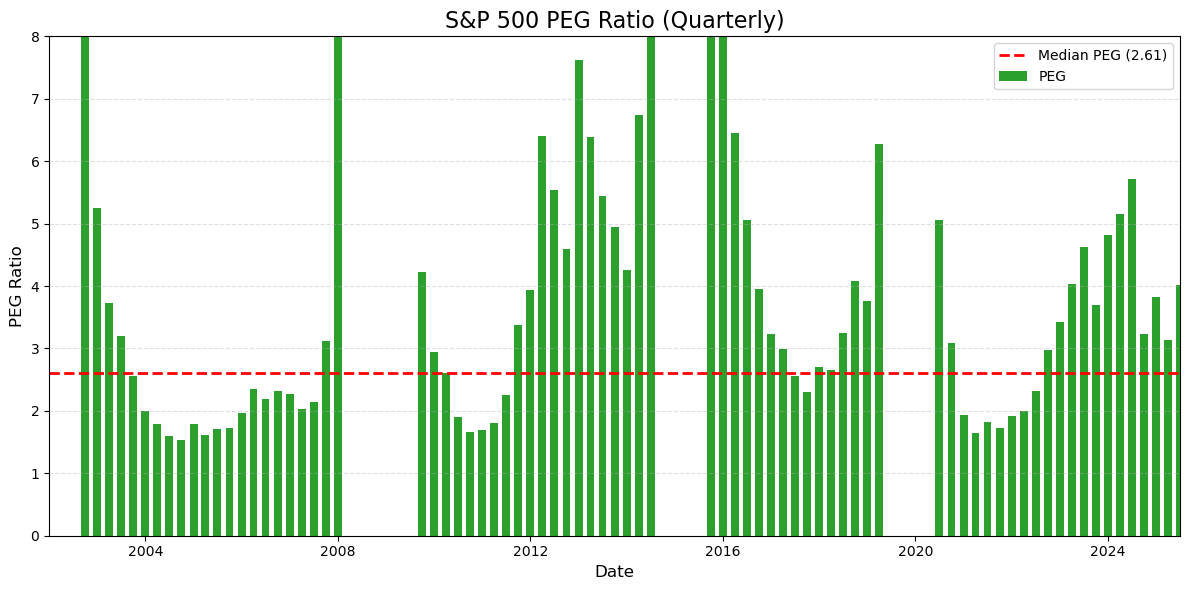

In [77]:
# PEG distribution
peg_median = peg_filtered["PEG"].median()

plt.figure(figsize=(12, 6))
plt.bar(
    peg_filtered["Date_shifted"],
    peg_filtered["PEG"],
    color="#2ca02c",
    width=60,
    label="PEG"
)

plt.axhline(
    y=peg_median,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Median PEG ({peg_median:.2f})"
)

plt.xlabel("Date", fontsize=12)
plt.ylabel("PEG Ratio", fontsize=12)
plt.title("S&P 500 PEG Ratio (Quarterly)", fontsize=16)
plt.ylim(0, 8)
plt.xlim(peg_filtered["Date_shifted"].min(), peg_filtered["Date_shifted"].max())
plt.grid(True, axis='y', linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

In [79]:
peg_filtered.nlargest(5, "PEG")

,Date_shifted,pe,sales_growth_per_share_yoy,PEG
897,2002-10-01,32.1044,0.02,1605.220000
1053,2015-10-01,24.0305,0.20,120.152500
1038,2014-07-01,18.2207,0.38,47.949211
960,2008-01-01,22.8275,1.70,13.427941
1056,2016-01-01,22.4461,2.09,10.739761


In [81]:
peg_filtered.describe()

,Date_shifted,pe,sales_growth_per_share_yoy,PEG
count,95,95.000000,95.000000,95.000000
mean,2013-09-30 18:41:41.052631552,25.323915,4.880632,18.689223
min,2002-01-01 00:00:00,14.414000,-16.460000,-69.075789
25%,2007-11-16 00:00:00,18.041850,2.595000,1.718309
50%,2013-10-01 00:00:00,22.077700,5.980000,2.612319
75%,2019-08-16 00:00:00,25.493600,8.620000,4.153383
max,2025-07-01 00:00:00,120.390700,15.970000,1605.220000
std,NaN,16.388357,5.983676,165.374263


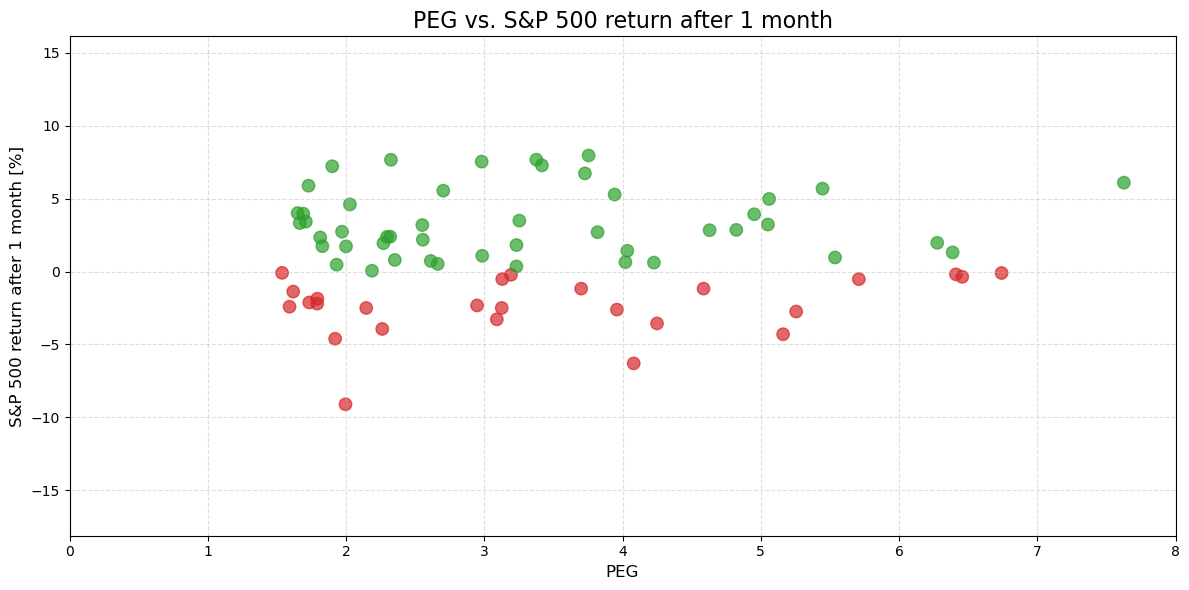

In [83]:
# Merge PEG data with 1-month forward returns
merged_plot = pd.merge(
    peg_filtered[["Date_shifted", "PEG"]],
    df_merged[["date", "pct_change_1M"]],
    left_on="Date_shifted",
    right_on="date",
    how="inner"
)

# Filter PEG <= 8
merged_plot = merged_plot[merged_plot["PEG"] <= 8]

# Colors: green if return >= 0, red if return < 0
colors = merged_plot["pct_change_1M"].apply(
    lambda x: "#2ca02c" if x >= 0 else "#d62728"
)

plt.figure(figsize=(12, 6))
plt.scatter(
    merged_plot["PEG"],
    merged_plot["pct_change_1M"],
    color=colors,
    alpha=0.7,
    s=80
)
plt.xlabel("PEG", fontsize=12)
plt.ylabel("S&P 500 return after 1 month [%]", fontsize=12)
plt.title("PEG vs. S&P 500 return after 1 month", fontsize=16)
plt.xlim(0, 8)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

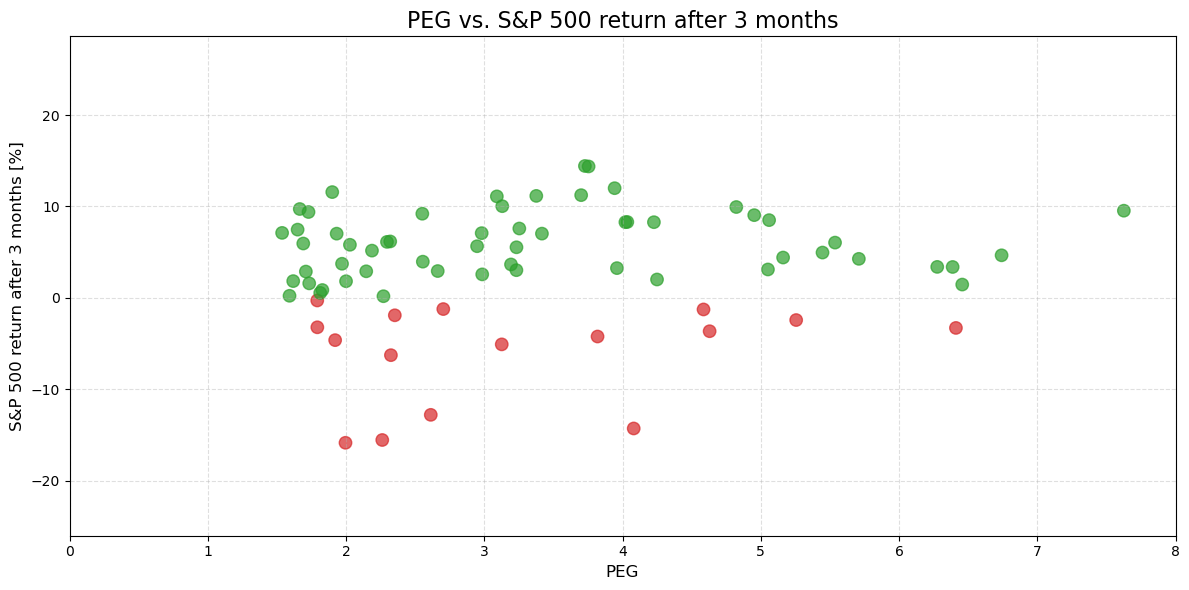

In [85]:
merged_plot = pd.merge(
    peg_filtered[["Date_shifted", "PEG"]],
    df_merged[["date", "pct_change_3M"]],
    left_on="Date_shifted",
    right_on="date",
    how="inner"
)

merged_plot = merged_plot[merged_plot["PEG"] <= 8]

colors = merged_plot["pct_change_3M"].apply(
    lambda x: "#2ca02c" if x >= 0 else "#d62728"
)

plt.figure(figsize=(12, 6))
plt.scatter(
    merged_plot["PEG"],
    merged_plot["pct_change_3M"],
    color=colors,
    alpha=0.7,
    s=80
)
plt.xlabel("PEG", fontsize=12)
plt.ylabel("S&P 500 return after 3 months [%]", fontsize=12)
plt.title("PEG vs. S&P 500 return after 3 months", fontsize=16)
plt.xlim(0, 8)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

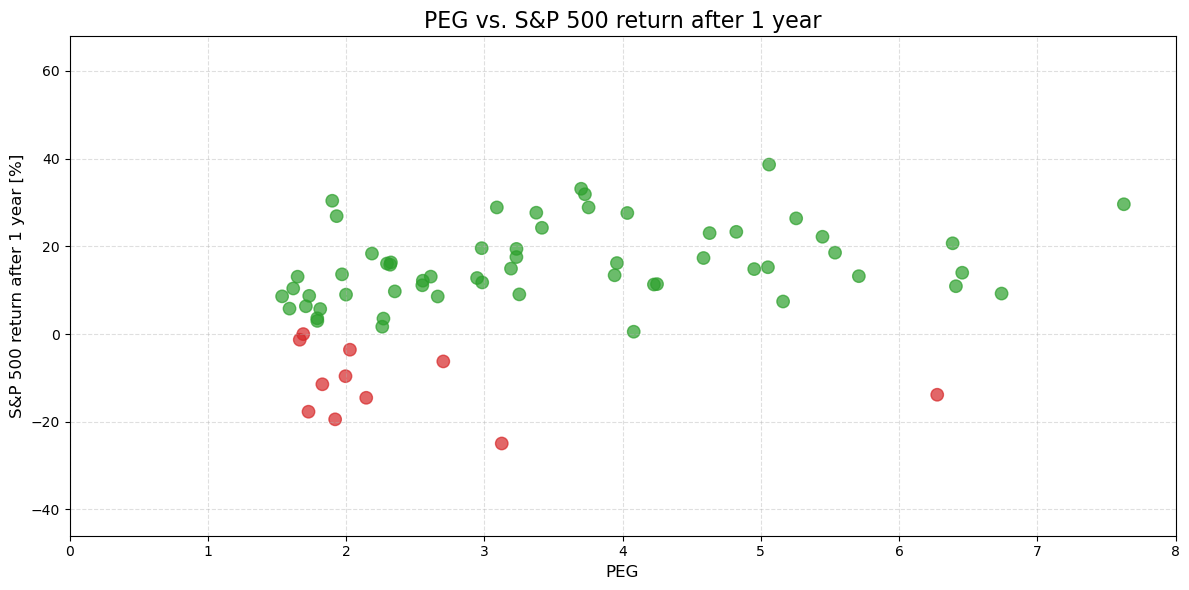

In [87]:
merged_plot = pd.merge(
    peg_filtered[["Date_shifted", "PEG"]],
    df_merged[["date", "pct_change_1Y"]],
    left_on="Date_shifted",
    right_on="date",
    how="inner"
)

merged_plot = merged_plot[merged_plot["PEG"] <= 8]

colors = merged_plot["pct_change_1Y"].apply(
    lambda x: "#2ca02c" if x >= 0 else "#d62728"
)

plt.figure(figsize=(12, 6))
plt.scatter(
    merged_plot["PEG"],
    merged_plot["pct_change_1Y"],
    color=colors,
    alpha=0.7,
    s=80
)
plt.xlabel("PEG", fontsize=12)
plt.ylabel("S&P 500 return after 1 year [%]", fontsize=12)
plt.title("PEG vs. S&P 500 return after 1 year", fontsize=16)
plt.xlim(0, 8)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

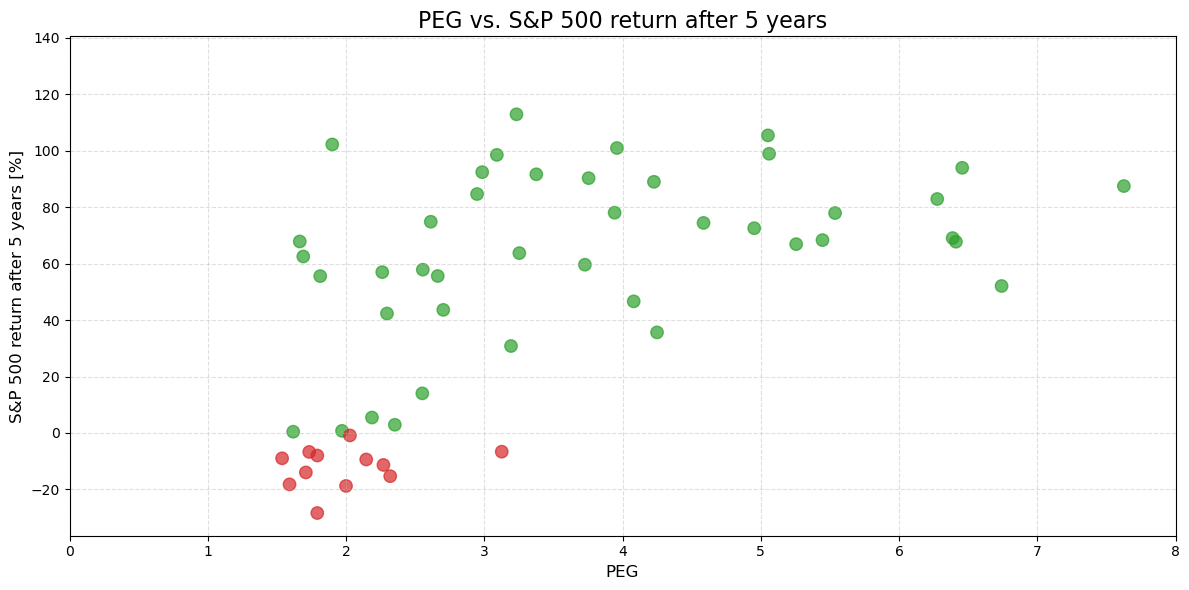

In [89]:
merged_plot = pd.merge(
    peg_filtered[["Date_shifted", "PEG"]],
    df_merged[["date", "pct_change_5Y"]],
    left_on="Date_shifted",
    right_on="date",
    how="inner"
)

merged_plot = merged_plot[merged_plot["PEG"] <= 8]

colors = merged_plot["pct_change_5Y"].apply(
    lambda x: "#2ca02c" if x >= 0 else "#d62728"
)

plt.figure(figsize=(12, 6))
plt.scatter(
    merged_plot["PEG"],
    merged_plot["pct_change_5Y"],
    color=colors,
    alpha=0.7,
    s=80
)
plt.xlabel("PEG", fontsize=12)
plt.ylabel("S&P 500 return after 5 years [%]", fontsize=12)
plt.title("PEG vs. S&P 500 return after 5 years", fontsize=16)
plt.xlim(0, 8)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

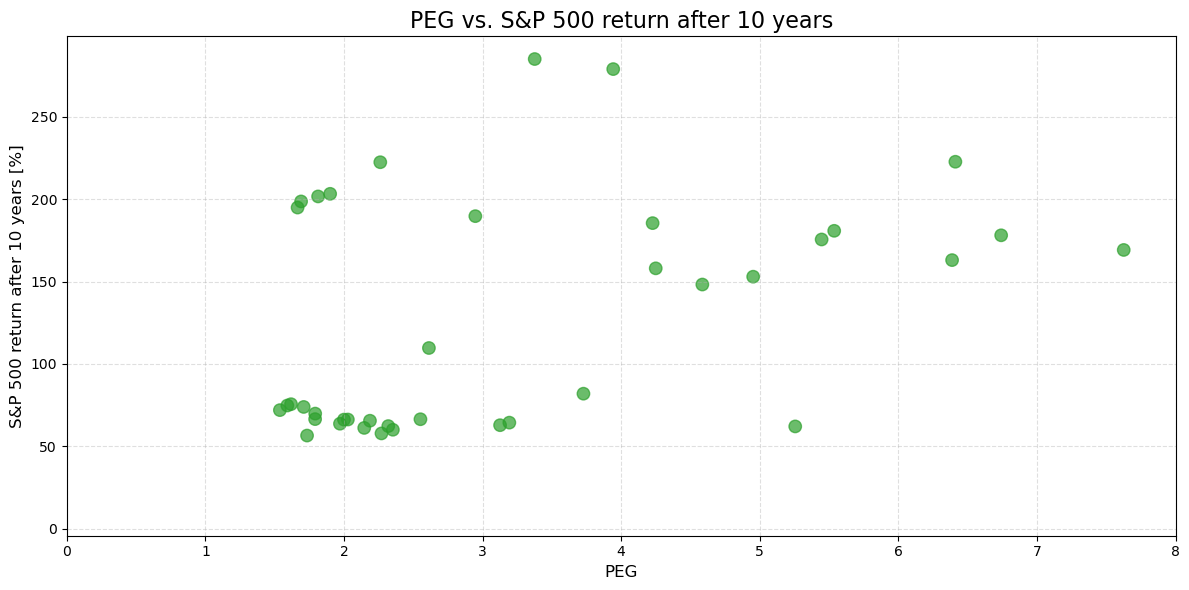

In [91]:
merged_plot = pd.merge(
    peg_filtered[["Date_shifted", "PEG"]],
    df_merged[["date", "pct_change_10Y"]],
    left_on="Date_shifted",
    right_on="date",
    how="inner"
)

merged_plot = merged_plot[merged_plot["PEG"] <= 8]

colors = merged_plot["pct_change_10Y"].apply(
    lambda x: "#2ca02c" if x >= 0 else "#d62728"
)

plt.figure(figsize=(12, 6))
plt.scatter(
    merged_plot["PEG"],
    merged_plot["pct_change_10Y"],
    color=colors,
    alpha=0.7,
    s=80
)
plt.xlabel("PEG", fontsize=12)
plt.ylabel("S&P 500 return after 10 years [%]", fontsize=12)
plt.title("PEG vs. S&P 500 return after 10 years", fontsize=16)
plt.xlim(0, 8)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

In [93]:
# Merge PEG with all forward return horizons
peg_pct_table = pd.merge(
    peg_filtered[["Date_shifted", "PEG"]],
    df_merged[
        ["date", "pct_change_1M", "pct_change_3M",
         "pct_change_1Y", "pct_change_5Y", "pct_change_10Y"]
    ],
    left_on="Date_shifted",
    right_on="date",
    how="inner"
)

# Select required columns and sort by date
peg_pct_table = peg_pct_table[
    ["Date_shifted", "PEG", "pct_change_1M", "pct_change_3M",
     "pct_change_1Y", "pct_change_5Y", "pct_change_10Y"]
].sort_values("Date_shifted").reset_index(drop=True)

peg_pct_table

,Date_shifted,PEG,pct_change_1M,pct_change_3M,pct_change_1Y,pct_change_5Y,pct_change_10Y
0,2002-01-01,-5.415041,-2.254199,-0.134130,-23.365964,23.536696,9.539407
1,2002-04-01,-7.335829,-5.240120,-15.515377,-25.124291,23.925893,22.845249
2,2002-07-01,-8.337060,-8.670836,-12.464776,1.411241,55.200530,40.624581
3,2002-10-01,1605.220000,6.256566,3.763375,20.085859,82.453337,70.358887
4,2003-01-01,5.255549,-2.741469,-2.425499,26.380400,66.893225,62.100194
...,...,...,...,...,...,...,...
90,2024-07-01,5.708965,-0.518890,4.267695,13.203800,NaN,NaN
91,2024-10-01,3.231762,0.351212,3.028332,17.559890,NaN,NaN
92,2025-01-01,3.818685,2.701630,-4.226040,NaN,NaN,NaN
93,2025-04-01,3.129329,-0.513569,10.028989,NaN,NaN,NaN


In [95]:
peg_pct_table[peg_pct_table["pct_change_5Y"] < 0]

,Date_shifted,PEG,pct_change_1M,pct_change_3M,pct_change_1Y,pct_change_5Y,pct_change_10Y
8,2004-01-01,1.999311,1.727639,1.821174,8.993452,-18.766641,66.231376
9,2004-04-01,1.791135,-2.196666,-0.285302,3.599283,-28.360583,66.540356
10,2004-07-01,1.590559,-2.411109,0.226767,5.801903,-18.212654,74.794059
11,2004-10-01,1.536879,-0.087494,7.107383,8.600094,-8.983652,71.998235
12,2005-01-01,1.791711,-1.857384,-3.218034,3.001023,-7.988982,69.887437
14,2005-07-01,1.708719,3.425039,2.877509,6.342722,-13.987304,73.924184
15,2005-10-01,1.732962,-2.119941,1.585272,8.710859,-6.719514,56.559586
19,2006-10-01,2.318957,2.392490,6.172106,15.809415,-15.303360,62.313887
20,2007-01-01,2.269934,1.948804,0.180493,3.529573,-11.330471,57.853064
21,2007-04-01,2.027422,4.605666,5.805638,-3.566849,-0.872008,66.288022


In [97]:
# Define PEG buckets
bins = [0, 2, 4, 6, 8]
labels = ["0–2", "2–4", "4–6", "6–8"]

# Create PEG bucket column
peg_pct_table["PEG_bucket"] = pd.cut(
    peg_pct_table["PEG"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Columns with forward returns
pct_columns = [
    "pct_change_1M", "pct_change_3M",
    "pct_change_1Y", "pct_change_5Y", "pct_change_10Y"
]

# Group by PEG buckets and calculate mean returns
mean_returns_by_bucket = (
    peg_pct_table
    .groupby("PEG_bucket")[pct_columns]
    .mean()
    .reset_index()
)

mean_returns_by_bucket

C:\Users\lukas\AppData\Local\Temp\ipykernel_26172\368906507.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("PEG_bucket")[pct_columns]


,PEG_bucket,pct_change_1M,pct_change_3M,pct_change_1Y,pct_change_5Y,pct_change_10Y
0,0–2,0.690479,2.511814,4.508056,14.331110,109.066882
1,2–4,2.029086,3.909399,12.885760,48.540052,115.664123
2,4–6,0.537395,3.469803,18.064558,73.564304,151.895780
3,6–8,1.456389,3.187644,11.767048,75.526006,183.281046


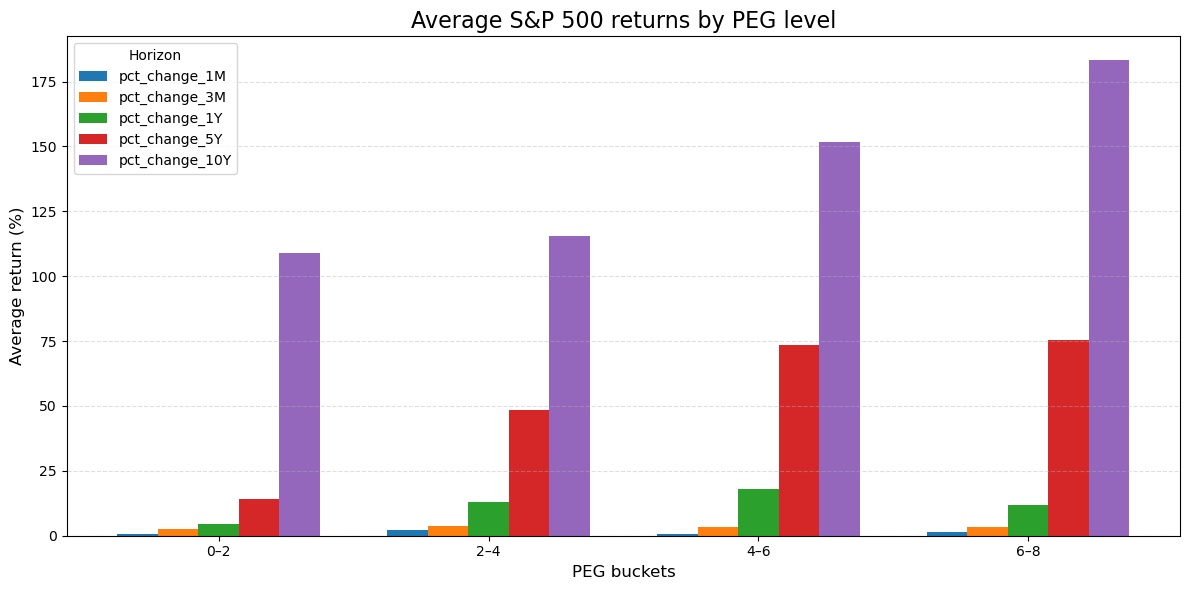

In [99]:
# Prepare data for bar chart
labels = mean_returns_by_bucket["PEG_bucket"]
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))

for i, col in enumerate(pct_columns):
    ax.bar(x + i * width, mean_returns_by_bucket[col], width, label=col)

ax.set_xlabel("PEG buckets", fontsize=12)
ax.set_ylabel("Average return (%)", fontsize=12)
ax.set_title("Average S&P 500 returns by PEG level", fontsize=16)
ax.set_xticks(x + width * 2)
ax.set_xticklabels(labels)
ax.legend(title="Horizon")
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()